# Prosper Loans Exploration
## by Jennifer Romana

## Preliminary Wrangling

Prosper loans is a peer-to-peer lending marketplace, which connects borrowers with investors who can choose to fund their loans.  This document explores the dataset of Prosper Loans between Nov-2005 and Mar-2014.  The dataset includes such variables as basic loan data, customer and some lender information.  

In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [6]:
# base colours for charts
base_colour = sb.color_palette()[0]
base_palette='Blues'

In [7]:
# Title and axis format for charts
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
  'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'14'}

In [8]:
# load in the dataset into a pandas dataframe, print statistics
loan_df = pd.read_csv('data/prosperLoanData.csv')
print(loan_df.shape)
loan_df.head()

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [9]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

#### Prepare data for analysis

In [10]:
#Change data type for time variables

loan_df['ListingCreationDate'] = pd.to_datetime(loan_df['ListingCreationDate'])

loan_df['LoanOriginationDate'] = pd.to_datetime(loan_df['LoanOriginationDate'])

In [11]:
loan_df[['ListingCreationDate','LoanOriginationDate']].describe()

,ListingCreationDate,LoanOriginationDate
count,113937,113937
unique,113064,1873
top,2013-10-02 17:20:16.550000,2014-01-22 00:00:00
freq,6,491
first,2005-11-09 20:44:28.847000,2005-11-15 00:00:00
last,2014-03-10 12:20:53.760000,2014-03-12 00:00:00


In [12]:
# Convert 'ProsperRating (Alpha)' to ordered variable
# Ordered lowest risk to highest to highet risk 

PRating = ['HR','E','D','C','B','A','AA']

ordered_PRating = pd.api.types.CategoricalDtype(ordered=True, categories=PRating)

loan_df['ProsperRating (Alpha)'] = loan_df['ProsperRating (Alpha)'].astype(ordered_PRating)

# Convert 'CreditGrade' to ordered variable

CrGrade = ['NC','HR','E','D','C','B','A','AA']

ordered_CrGrade = pd.api.types.CategoricalDtype(ordered=True, categories=CrGrade)

loan_df['CreditGrade'] = loan_df['CreditGrade'].astype(ordered_CrGrade)

In [13]:
#Convert 'IncomeRange' to ordered variable

IncRange=['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999',

          '$75,000-99,999','$100,000+']

ordered_IncRange = pd.api.types.CategoricalDtype(ordered=True, categories=IncRange)

loan_df['IncomeRange'] = loan_df['IncomeRange'].astype(ordered_IncRange)

In [14]:
# Convert 'LoanStatus' to ordered variable
LStat = ['Cancelled','Completed', 'Current', 'FinalPaymentInProgress',
         'Chargedoff','Defaulted',
         'Past Due (1-15 days)', 'Past Due (16-30 days)',
         'Past Due (31-60 days)','Past Due (61-90 days)',
         'Past Due (91-120 days)','Past Due (>120 days)']

ordered_LStat = pd.api.types.CategoricalDtype(ordered=True, categories=LStat)

loan_df['LoanStatus'] = loan_df['LoanStatus'].astype(ordered_LStat)

### What is the structure of your dataset?
There are 113,937 Prosper Loans in this dataset with 81 variables each.  The variables include: 
- data about the loan, from the basics such as amount, term, origination date to more in depth such as service fees and principal losses , 
- data about the borrower, including credit rating (Agency and in-house), location, occupation and income
- some information about investor such as Lender Yield and Number of investors 


After inspection, some variables have been ordered for consistency:
- `ProsperRating (Alpha)`: HR, E, D, C, B, A, AA
- `CreditGrade`: NC, HR, E, D, C, B, A, AA
- `IncomeRange`: Not displayed, Not employed, `$`0, `$`1-24,999, `$`25,000-49,999, `$`50,000-74,999, `$`75,000-99,999, `$`100,000+
- `LoanStatus`: Cancelled, Completed, Current, FinalPaymentInProgress, Chargedoff, Defaulted, Past Due (1-15 days), Past Due (16-30 days), Past Due (31-60 days), Past Due (61-90 days), Past Due (91-120 days), Past Due (>120 days)

and changed to date time format
- `ListingCreationDate`
- `LoanOriginationDate`

### What is/are the main feature(s) of interest in your dataset?
As a prospective investor in Prosper Peer to Peer loans, I would like to explore the data specifically for potential returns, associated risks and whether the Prosper Ratings are helpful in optimizing for both.

The main variables of interest relate to returns and risk.  In the broad sense:

- `LenderYield` - as measure of potential returns
- `LoanStatus` - categorizes the potential risk (ie, performing vs non-performing loans)
- `LP_NetPrincipalLoss` - as measure of losses
- `ProsperRating (Alpha)` - as measure of risk

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

There are many supporting features that will be investigated especially in order to determine any trends and patterns when measuring risk.

The broad groups of supporting variables are:
##### Risk predictors:
- Credit Score Range Lower
- Credit Score Range Upper
- Inquiries Last 6 Months
- Estimated Losses

##### Risk in terms of Ability to pay off the loan
- Debt to Income Ratio 
- Occupation
- Income Range
- Stated Monthly Income
- Monthly Loan Payment

##### Investment options
- Listing Category
- Loan Original Amount
- Loan Origination Date
- Term


## Univariate Exploration

In this section, we will familiarize ourselves with the variables of interest.

### Explore distribution of loans over time

C:\Users\Jen\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


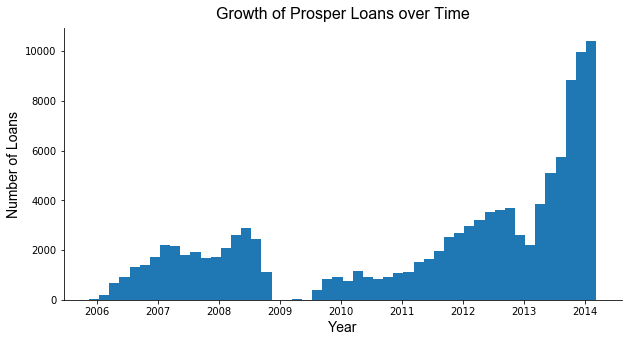

In [15]:
# Frequency of number of loans over time
plt.figure(figsize=(10,5))
plt.hist(data=loan_df, x='LoanOriginationDate', bins=50)
plt.xlabel('Year', fontdict=axis_font)
plt.ylabel('Number of Loans', fontdict=axis_font)
plt.title('Growth of Prosper Loans over Time', fontdict=title_font)
sb.despine();

The number of Prosper loans has rapidly increased since 2013, following a relatively steady rise since 2009. According to Wikipedia and news reports, Prosper had a quiet period towards the end of 2008 to mid 2009. Additionally since relaunch in 2009, Prosper has changed its business model and introduced a new proprietary Prosper Rating system.

### New Dataset
The dataset will therefore be separated between pre and post 2009, with the analysis focussing on post 2009, Prosper 2.0 data.


In [16]:
#Separate loan data based on July 2009 SEC relaunch
loans_post2009 = loan_df[loan_df['LoanOriginationDate']>('2009-06-30')].sort_values('LoanOriginationDate')
loans_pre2009 = loan_df[loan_df['LoanOriginationDate']<('2009-07-01')].sort_values('LoanOriginationDate')

In [17]:
loans_post2009.shape

(84984, 81)

The new dataset excludes pre-2009 data and has 89,984 loans with 81 variables

### What are the potential returns?

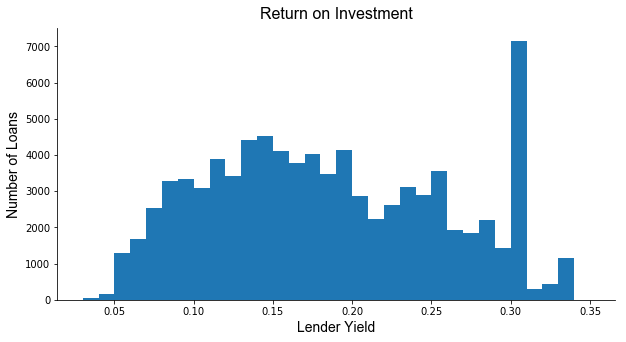

In [18]:
# Lender Yield
plt.figure(figsize=(10,5))
bin_edges = np.arange(0.03,loans_post2009['LenderYield'].max()+0.01, 0.01)

plt.hist(data=loans_post2009, x='LenderYield', bins=bin_edges)
plt.xlabel('Lender Yield',fontdict=axis_font)
plt.ylabel('Number of Loans', fontdict=axis_font)
plt.title('Return on Investment', fontdict=title_font)
sb.despine();

In [19]:
loans_post2009['LenderYield'].describe()

count    84984.000000
mean         0.185966
std          0.074656
min          0.030000
25%          0.125900
50%          0.177500
75%          0.247400
max          0.340000
Name: LenderYield, dtype: float64

Returns on investment, as measured by Lender Yield range from 4-34%.  Lender Yield almost appears normally distributed, centred around the mean of 18% and right skewed with modes at 15%, 26% and 31%.

The spike at 31% will possibly be of interest.

### What are the investment options?
This section explores Prosper Loans from the view of the investor and what investment options are available
- Investment amount (Loan amount)
- Purpose of investment (Purpose of Loan)
- Length of Investment (Loan Term)

##### Investment Amount
The investment is to finance loans.

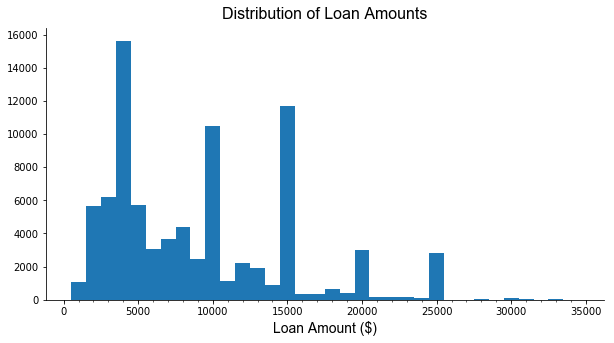

In [20]:
# Amount borrowed
fig, ax=plt.subplots(figsize=(10,5))
bin_edges=np.arange(500,loans_post2009['LoanOriginalAmount'].max()+500,1000)
major_ticks=np.arange(0,loans_post2009['LoanOriginalAmount'].max()+1000,5000)
minor_ticks=np.arange(0,loans_post2009['LoanOriginalAmount'].max()+1000,1000)
plt.hist(data=loans_post2009, x='LoanOriginalAmount', bins=bin_edges)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
plt.xlabel('Loan Amount ($)', fontdict=axis_font)
plt.title('Distribution of Loan Amounts', fontdict=title_font)
sb.despine();

Prosper offers loans between `$`2k and `$`40K, with the bulk of loan investment opportunities at `$`4,000, followed by `$`15k and `$`10k.
While it makes sense that there are spikes at `$`5,000 marks (eg `$`10k, `$`15k, `$`20k, `$`25k) due to the tendency to round to a "nice" number, it is interesting that the bulk of loans are `$`4,000, suggesting there might be a significant step in lending criteria should a borrower wish to borrow more than `$`4,000.

On further investigation, it appears the `$`1,000 loans were phased out after 2010.

There are no loans greater than `$`35k in this dataset, with the number of loans dropping off to negligible after `$`25k.

##### Purpose of Investment
This metric may be important not only to look for trends of risk vs reward, but also gives an investor some control over what they invest in.

In [21]:
# map listing category (numeric) to a meaningful listing
loan_purpose_map = {0 : 'Not Available', 
                     1 : 'Debt Consolidation', 
                     2 : 'Home Improvement', 
                     3 : 'Business', 
                     4 : 'Personal Loan', 
                     5 : 'Student Use', 
                     6 : 'Auto', 
                     7 : 'Other', 
                     8 : 'Baby&Adoption', 
                     9 : 'Boat', 
                     10 : 'Cosmetic Procedure', 
                     11 : 'Engagement Ring', 
                     12 : 'Green Loans', 
                     13 : 'Household Expenses', 
                     14 : 'Large Purchases', 
                     15 : 'Medical/Dental', 
                     16 : 'Motorcycle', 
                     17 : 'RV', 
                     18 : 'Taxes', 
                     19 : 'Vacation', 
                     20 : 'Wedding Loans'}

In [22]:
tick_props=loans_post2009['ListingCategory (numeric)'].value_counts().index
tick_list=[]
for i in tick_props:
    tick_list.append(loan_purpose_map[i])

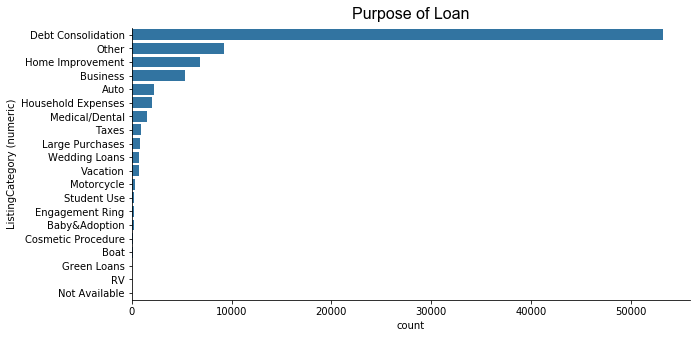

In [23]:
#Purpose of Loan
plt.figure(figsize=(10,5))
ax=sb.countplot(data=loans_post2009, y='ListingCategory (numeric)', color=base_colour, order=tick_props)
plt.yticks(ax.get_yticks(),labels=tick_list)
plt.title('Purpose of Loan', fontdict=title_font)
sb.despine();

An investor is investing to finance personal loans.  The vast majority of loans are for debt consolidation, followed by 'Other'

##### Length of Investment

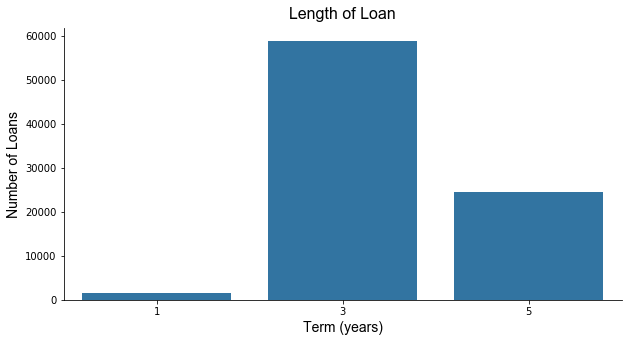

In [24]:
#Term
plt.figure(figsize=(10,5))
sb.countplot(data=loans_post2009, x='Term', color=base_colour)
plt.xticks(ticks=[0,1,2], labels=['1','3','5'])
plt.xlabel('Term (years)',fontdict=axis_font)
plt.ylabel('Number of Loans', fontdict=axis_font)
plt.title('Length of Loan', fontdict=title_font)
sb.despine();

Investment in Prosper Loans is for a fixed term with no secondary market to sell the loan.  Most loans are for 3 years, followed by 5, then 1 year.  This metric will be of interest as there is a risk that you may miss another investment opportunity since your funds are tied up for a fixed term, plus the window for possible default increases with term length of loan.

### The risk of investing in Prosper Personal Loans
This section explores and defines risk in terms of investing in Personal Loans.
- How do we define risk
- What is the investor risking?
    - Losses - Estimated and actual Net Principal Loss

#### How do we define risk?

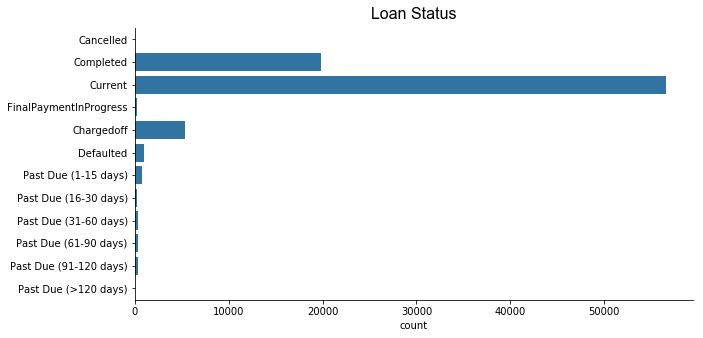

In [25]:
# Loan Status
plt.figure(figsize=(10,5))
sb.countplot(data=loans_post2009, y='LoanStatus', color=base_colour)
plt.title('Loan Status', fontdict=title_font)
plt.ylabel("")
sb.despine();

The risk of investing in Prosper Loans is that the loan will go in Default or Chargedoff, that is the investor will not or unlikely receive their initial investment plus interest back.  

##### Definition of Non-Performing Loans
According to the 2019 Prosper Prospectus:
> *If payments on the Borrower Loan corresponding to an investor's Note become more than 30 days overdue, such investor will be unlikely to receive the full principal and interest payments that were expected on the Note, and such investor may not recover the original purchase price on the Note.*

Therefore Non-Performing Loans will be defined as *Chargedoff*, *Defaulted* and *Past Due* 31+ days. 

A new variable `NonPerfLoan` will be created to separate the Performing (False) and Non-Performing Loans (True).

In [26]:
# New Variable NonPerfLoan so map the non- and performing loans
non_perf_loans=['Chargedoff','Defaulted','Past Due \(31-60 days\)','Past Due \(61-90 days\)'
                'Past Due \(91-120 days\)','Past Due \(>120 days\)']     

for nonp_loan in non_perf_loans:
    loans_post2009.loc[loans_post2009['LoanStatus'].str.contains(nonp_loan), 'NonPerfLoan']=True

loans_post2009.loc[loans_post2009['NonPerfLoan'].isnull(),'NonPerfLoan']=False

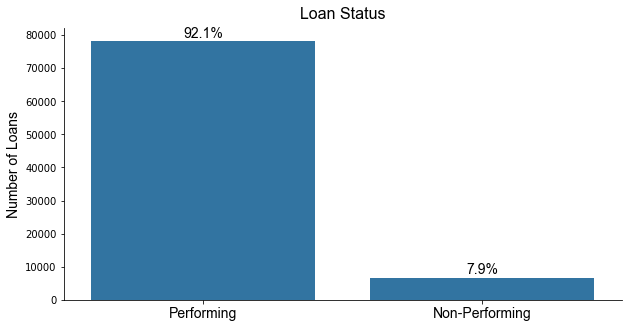

In [27]:
loan_counts= loans_post2009['NonPerfLoan'].value_counts()
n_loans=loans_post2009.shape[0]

plt.figure(figsize=(10,5))
ax=sb.countplot(data=loans_post2009, x='NonPerfLoan', order=loan_counts.index,
                color=base_colour )
plt.title('Loan Status', fontdict=title_font)
sb.despine();

#add annotation
for i in range(loan_counts.shape[0]):
    count = loan_counts[i]
    pct_string='{:0.1f}%'.format(100*count/n_loans)
    # first argumentis x-position, just after the bar, 2nd argument y position
    # 3rd arg: string to be printed, the percentage
    # 4th arg: optional to center vertical alignment
    plt.text(i, count+1000, pct_string,ha='center', fontdict=axis_font)
    
ax.set_xticklabels(['Performing','Non-Performing'], fontdict=axis_font)
plt.xlabel('')
plt.ylabel('Number of Loans', fontdict=axis_font)
plt.tight_layout;

#### What is the investor risking?
The risk is that an investor will lose the initial investment.

- **Estimated Loss**

Estimated Principal Loss on chargeoff

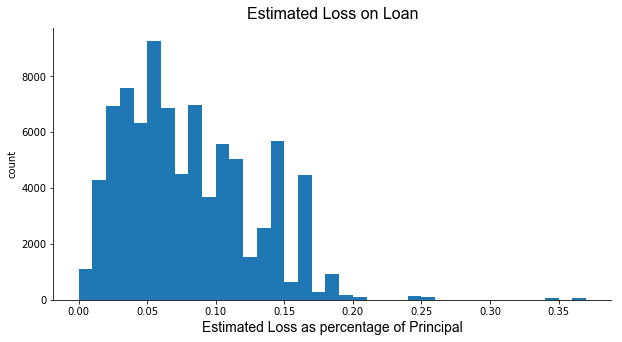

In [28]:
# Prosper Estimated Loss 
plt.figure(figsize=(10,5))
bin_edges=np.arange(0,loans_post2009['EstimatedLoss'].max()+0.01,0.01)
plt.hist(data=loans_post2009, x='EstimatedLoss', bins=bin_edges)
plt.ylabel('count')
plt.xlabel('Estimated Loss as percentage of Principal', fontdict=axis_font)
plt.title('Estimated Loss on Loan', fontdict=title_font)
sb.despine();

Prosper's Estimated Loss is in percentage terms

- **Estimated Loss in Dollars**

In order to compare Estimated Losses with Actual Losses, a new variable `EstimatedLoss_Dollars` will be created, which is the product of Estimated Loss  and Loan Amount

In [29]:
loans_post2009['EstimatedLoss_Dollars'] = loans_post2009['EstimatedLoss'] * loans_post2009['LoanOriginalAmount']

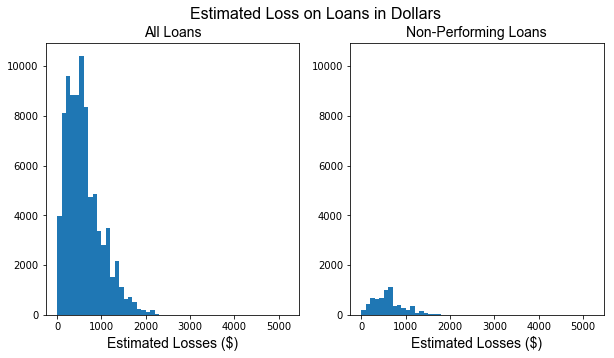

In [30]:
# Estimated Loss in Dollars
bin_edges=np.arange(0,loans_post2009['EstimatedLoss_Dollars'].max()+100,100)
plt.figure(figsize=(10,5))

plt.suptitle('Estimated Loss on Loans in Dollars', fontdict=title_font, fontsize='16')

# plot Estimated Loss in Dollars for all loans 
ax1=plt.subplot(1,2,1)
plt.hist(data=loans_post2009, x='EstimatedLoss_Dollars', bins=bin_edges)
plt.xlabel('Estimated Losses ($)', fontdict=axis_font)
plt.title('All Loans', fontdict=axis_font);

# Plot Estimated Loss in Dollars for Non-Performing Loans
plt.subplot(1,2,2)
plt.hist(loans_post2009.loc[loans_post2009['NonPerfLoan']==True, 'EstimatedLoss_Dollars'], bins=bin_edges);
plt.ylim(ax1.get_ylim())
plt.xlabel('Estimated Losses ($)', fontdict=axis_font)
plt.title('Non-Performing Loans', fontdict=axis_font);


Estimated Losses over all loans seem normally distributed with a right skew and 2 modes at `$`300 and `$`600.  In contrast, estimated losses for Non-performing loans peak at `$`700 and drop off.

- **Net Principal Loss**
The principal that remains uncollected after any recoveries on chargedoff loans

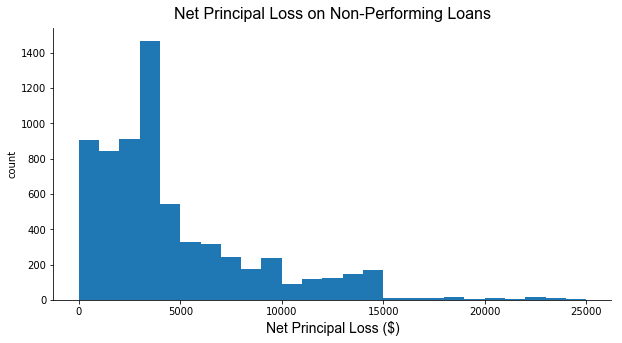

In [31]:
plt.figure(figsize=(10,5))
bin_edges=np.arange(0,loans_post2009['LP_NetPrincipalLoss'].max()+1000,1000)
plt.hist(loans_post2009.loc[loans_post2009['NonPerfLoan']==True, 'LP_NetPrincipalLoss'], bins=bin_edges)
plt.xlabel('Net Principal Loss ($)', fontdict=axis_font)
plt.ylabel('count')
plt.title('Net Principal Loss on Non-Performing Loans', fontdict=title_font)
sb.despine();

- It is interesting that the net principal loss cuts out at `$`25k, even though loans can be up to `$`35k.  This chart suggests that the larger loans has at least some repayments and/or recovery should they become charged off.  This could also just be a result of low number of data points greater than `$`25k.  Looking back at the distribution of loan amounts, the number of loans greater than `$`25k siginificantly drops off.
- There is another cutoff at `$`15k that does not coincide with a dramatic drop off in number of loans as we saw with the `$`25k example above.  This value should be explored further
- The high frequency of Net Principal Loss at `$`4,000 coincides with the high frequency of `$`4,000 loans.  It is interesting that the losses at `$`10k and `$`15k are not proportionate to the number of loans at those amounts as the losses to number of loans at `$`4,000.  These relationships may be a result of the distribution of the loans over the varying credit-worthiness of the borrower 

### Risk Predictors
This section explores risk in terms of formal and common predictors of risk
- Formal Predictor of risk: Prosper Rating
- Formal and common predictor of risk: Credit Score from a credit agency
- Common predictor: Inquiries in the Last 6 Months

##### Prosper Rating

In [32]:
PRating_xlocs= [0, 1, 2, 3, 4, 5, 6]
PRating_Risk = ['HR\nHigh Risk','E','D','C\nMid Risk','B','A','AA\nLow Risk']

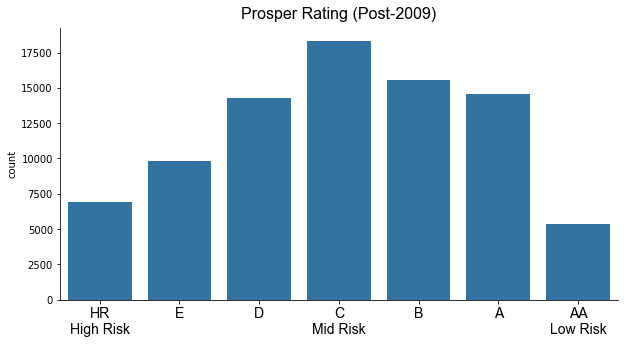

In [33]:
# Prosper rating distribution
plt.figure(figsize=(10,5))
ax = sb.countplot(data=loans_post2009, x='ProsperRating (Alpha)', color=base_colour)
plt.title('Prosper Rating (Post-2009)', fontdict=title_font)
ax.set_xticks(PRating_xlocs)
ax.set_xticklabels(PRating_Risk, minor=False, fontdict=axis_font)
plt.xlabel('')
sb.despine();

Prosper Ratings  has 7 categories, AA as low risk, C as mid risk and D, E and HR as high risk.  The distibution of ratings show a normal distribution with mode at Rating C.

Going forward, in terms of terminology, Prosper Ratings will be referenced in terms of their relation to risk, that is:
- **HR** rating is **high** risk
- **C*** rating is **mid** risk 
- **AA** rating is **low** risk

#### Credit Rating

For simplicity, the Lower and Upper Range of Credit Scores will be averaged into the new variable `CreditScoreMean`

In [34]:
loans_post2009['CreditScoreMean'] = (loans_post2009['CreditScoreRangeLower'] + loans_post2009['CreditScoreRangeUpper'])/2

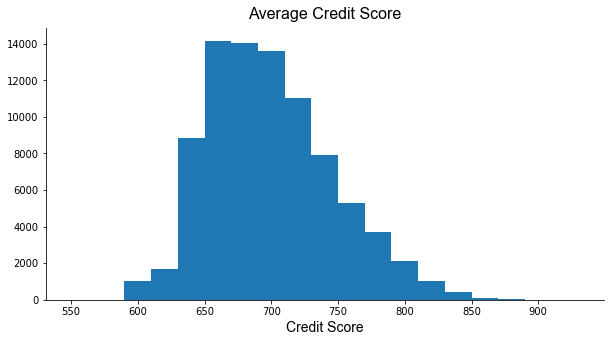

In [35]:
plt.figure(figsize=(10,5))
bin_edges = np.arange(600-50, loans_post2009['CreditScoreMean'].max()+50,20)
plt.hist(data=loans_post2009, x='CreditScoreMean', bins=bin_edges,color=base_colour)
plt.xlabel('Credit Score', fontdict=axis_font)
plt.title('Average Credit Score', fontdict=title_font)
sb.despine();

Credit scores display a normal distribution with peak at 650-700 range.  

#### Inquiries in last 6 Months

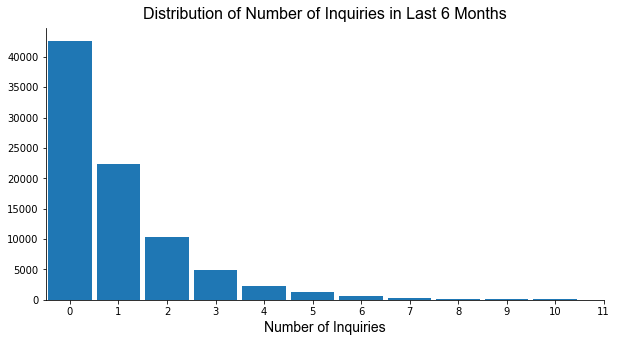

In [36]:
bin_edges=np.arange(-0.5, loans_post2009['InquiriesLast6Months'].max()+1,1)
plt.figure(figsize=(10,5))
plt.hist(data=loans_post2009, x='InquiriesLast6Months', bins=bin_edges, rwidth=0.9)
plt.xlim(-.5, loans_post2009['InquiriesLast6Months'].describe([.999])['99.9%'])
plt.xticks(np.arange(0,11+1,1))
plt.xlabel('Number of Inquiries', fontdict=axis_font)
plt.title('Distribution of Number of Inquiries in Last 6 Months', fontdict=title_font)
sb.despine();

In [37]:
loans_post2009[loans_post2009['InquiriesLast6Months']>5]['ListingCreationDate'].describe()

count                           1240
unique                          1230
top       2013-12-26 13:26:46.030000
freq                               2
first     2008-01-04 08:51:03.217000
last      2014-03-07 08:32:01.240000
Name: ListingCreationDate, dtype: object

One of the minimum requirements to borrow in the Prosper marketplace is 'Fewer than five credit bureau inquiries within the last 6 months'.  While the vast majority of loans do meet this requirement, it is interesting to note that there are cases of loans that have 6 or greater inquiries in the last 6 months.  On further investigation, these loans occur across the whole time frame of this dataset so can not be explained by a mismatch in timing between the possible introduction of the 'less than 5 inquiries' requirement and loan request/funding date.  This in turn suggests there must be avenues to apply for special consideration should the borrower not meet the minimum requirements.

### Ability to pay off Loan
This section explores risk in terms of whether a borrower has the ability to pay back the loan.
- Debt-to-Income ratio 
- Occupation
- Income
    - Income Range
    - Stated Monthly Income
- Monthly Loan Payment

#### Debt to Income Ratio

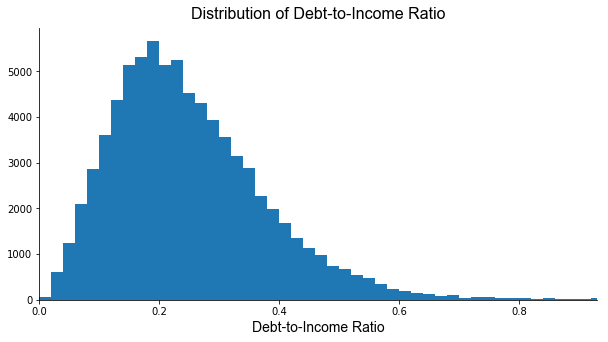

In [38]:
bin_edges = np.arange(0, loans_post2009['DebtToIncomeRatio'].max()+0.02, 0.02)
plt.figure(figsize=(10,5))
plt.hist(data=loans_post2009, x='DebtToIncomeRatio', bins=bin_edges)
plt.xlim(0,loans_post2009['DebtToIncomeRatio'].describe([0.995])['99.5%'])
plt.xlabel('Debt-to-Income Ratio', fontdict=axis_font)
plt.title('Distribution of Debt-to-Income Ratio', fontdict=title_font)
sb.despine();

In [39]:
loans_post2009[loans_post2009['DebtToIncomeRatio']>0.5]['ListingCreationDate'].describe()

count                           3431
unique                          3401
top       2013-10-03 20:09:45.413000
freq                               3
first     2007-11-05 09:31:59.820000
last      2014-03-07 15:41:43.297000
Name: ListingCreationDate, dtype: object

Debt to Income looks normally distributed, skewed right with a mode at 22%.  The data has been limited to 99.5 percentile to exclude the outliers of ratios of 10.01, which is the capped amount.

One of the minimum requirements to borrow throught the Prosper marketplace is a debt-to-income ratio of no more than 50%.    We can see there is a tail in the distribution that is greater than 50% and on further investigation spans the whole time frame of the dataset, suggesting there must be avenues to apply for special consideration should the borrower not meet the minimum requirements.  This might be an indication of how rigorous Prosper's screening system is and might need to be watched in order to manage risk

#### Occupation

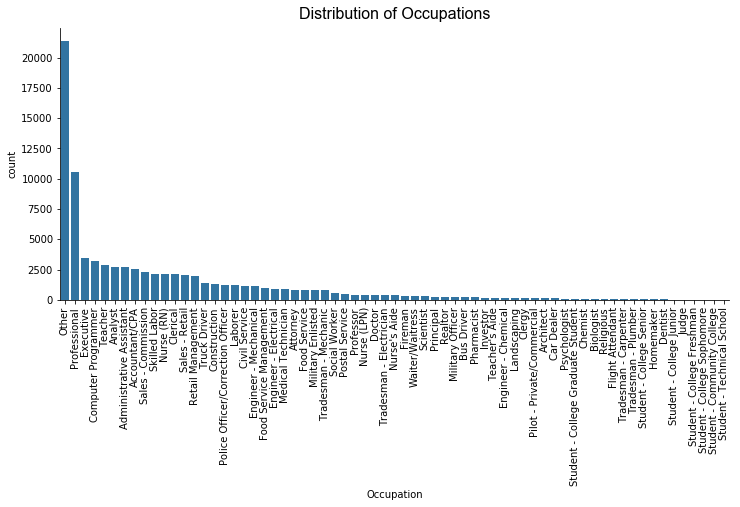

In [40]:
fig=plt.figure(figsize=(12,5))
occ_order = loans_post2009['Occupation'].value_counts().index
ax=sb.countplot(data=loans_post2009, x='Occupation', color=base_colour, order=occ_order )
plt.xticks(rotation=90)
plt.title('Distribution of Occupations', fontdict=title_font)
sb.despine();

'Other' by and large was the most selected occupation during the loan application process with the next category ‘Professional’ at about half the frequency of 'Other'.  The ability to easily select such a non-descriptive occupation in a Loan application probably speaks more about Prosper Loan's verification and vetoeing process rather than the quality of the borrower.

#### Income

- **Income Range**

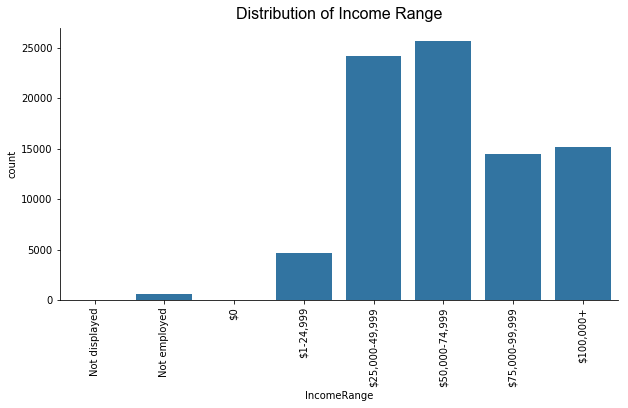

In [41]:
plt.figure(figsize=(10,5))
sb.countplot(data=loans_post2009, x='IncomeRange', color=base_colour)
plt.xticks(rotation=90)
plt.title('Distribution of Income Range', fontdict=title_font)
sb.despine();

The majority of borrowers are in the `$`25k-`$`75k income range.

The lack of loans in the income range of `$`0, while intuitive, also confirms that unlike the borrowing minimum requirements of less than 50% Debt-to-Income ratio and less than 5 Inquiries in the last 6 months, the minimum requirement of annual income greater than `$`0 is enforced and not applicable for special consideration.    However, Prosper notes that income is self-reported and not neccessarily verified. 

- **Stated Monthly Income**

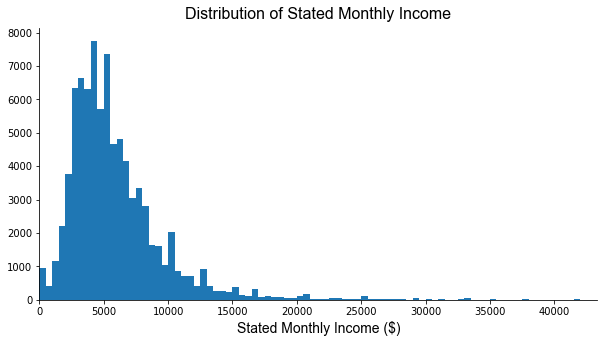

In [42]:
bin_edges= np.arange(0,loans_post2009['StatedMonthlyIncome'].max()+500,500)
plt.figure(figsize=(10,5))
plt.hist(data=loans_post2009, x='StatedMonthlyIncome', bins=bin_edges)
plt.xlim(0, loans_post2009['StatedMonthlyIncome'].describe([0.999])['99.9%'])
plt.xlabel('Stated Monthly Income ($)', fontdict=axis_font)
plt.title('Distribution of Stated Monthly Income', fontdict=title_font)
sb.despine();

Stated monthly income looks relatively normally distributed, with 2 spikes around `$`5,000 mark.  Stated income is self-reported and not neccessarily verified by Prosper.

#### Monthly Loan Repayment

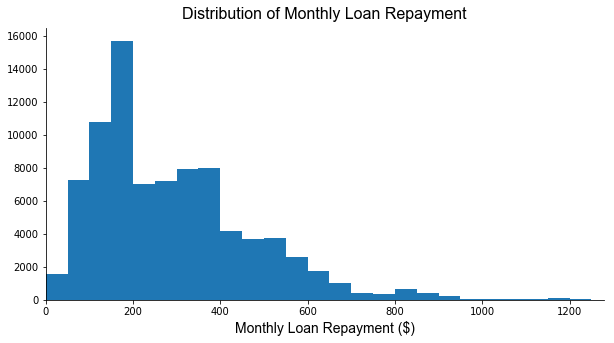

In [43]:
bin_edges= np.arange(0,loans_post2009['MonthlyLoanPayment'].max()+50,50)
plt.figure(figsize=(10,5))
plt.hist(data=loans_post2009, x='MonthlyLoanPayment', bins=bin_edges)
plt.xlim(0, loans_post2009['MonthlyLoanPayment'].describe([0.999])['99.9%'])
plt.xlabel('Monthly Loan Repayment ($)', fontdict=axis_font)
plt.title('Distribution of Monthly Loan Repayment', fontdict=title_font)
sb.despine();

Monthly loan payments spike at `$`150-200, which is in line with the highest frequency of loans at `$`4,000 and over a term of 3 years

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Variables of interest:
- **Lender Yield**  appears normally distributed, centred about the mean of 18% and right skewed with modes at 15%, 26% and 31%. The spike at 31% will possibly be of interest.
- **LoanStatus** was used in order to create a new variable `NonPerfLoan` to separate Non Performing and Performing Loans, based on the definition from the Prosper Loan 2019 prospectus
> If payments on the Borrower Loan corresponding to an investor's Note become more than 30 days overdue, such investor will be unlikely to receive the full principal and interest payments that were expected on the Note, and such investor may not recover the original purchase price on the Note.

`NonPerfLoan` is True if the loan in chargedoff, defaulted or past due 31+ days
- **LP_NetPrincipal Loss** cuts out at `$`25k, even though loans can be up to `$`35k, suggesting that the larger loans has at least some repayments and/or recovery should they become charged off or more realistically could just be a result of the low number of data points of loans greater than `$`25k.  The high frequency of Net Principal Loss at `$`4,000 coincides with the high frequency of `$`4,000 loans
- **Prosper Rating** show a normal distribution with mode at Rating C.

Going forward, in terms of terminology, Prosper Ratings will be referenced in terms of their relation to risk, that is:
- **HR** rating is **high** risk
- **C*** rating is **mid** risk 
- **AA** rating is **low** risk

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

**Risk predictors** 

- **Credit Score Range Lower** and **Credit Score Range Upper** were averaged to create `CreditScoreMean` for simplicity in analysis
- **Inquiries Last 6 Months** showed a right skewed distribution with the majority at 0 inquiries.  Minimum requirements for Prosper Loans require 5 or less inquiries in the last 6 months.  The right tail extending past 6 suggests the possibility of special consideration should this requirement not be met.   
- **Estimated Loss** is presented as a pecentage of Principal, a new variable `EstimatedLoss_Dollars`, the product of `EstimatedLoss` and `LoanOriginalAmount` was created to facilitate comparisons, such as with `LP_NetPrincipalLoss`, which is also in dollars 


**Risk in terms of Ability to pay off the loan**

- **Debt to Income Ratio** looks normally distributed, skewed right with a mode at 22%.  One of the minimum requirements to borrow throught the Prosper marketplace is a debt-to-income ratio of no more than 50\%.  The right tail that extends past 50% suggest avenues to apply for special consideration should this requirement not be met
- **Occupation** The highest frequency of occupation is 'Other' followed by 'Professional
- **Income Range** The majority of borrowers are in the `$`25k-`$`75k income range.  While the lack of `$`0 income range is intuitive, it also confirms that unlike the minimum requirements for Inquiries and Debt-to-Income ratio, this minimum requirememt of greater than `$`0 annual income is a hard line requirement. 


**Investment options**

- **Listing Category**  The majority of loans is for debt consolidation
- **Loan Original Amount** Prosper offers loans between `$`2k and `$`40k, with the bulk of loan investment opportunities at `$`4,000, followed by `$`15k and `$`10k.  While it makes sense that there are spikes at `$`5,000 marks (eg `$`10k, `$`15k, `$`20k, `$`25k) due to the tendency to round to a "nice" number, it is interesting that the bulk of loans are `$`4,000, suggesting there might be a significant step in lending criteria should an investor wish to borrow more than `$`4,000. 
- **Term** Investment in Prosper Loans is for a fixed term with no secondary market to sell the loan.  Most loans are for 3 years, followed by 5, then 1 year.  This metric will be of interest as there is a risk that you may miss another investment opportunity since your funds are tied up for a fixed term, plus the window for possible default increases with term length of loan.




## Bivariate Exploration

In this section, the exploration of Prosper Loans as invesments continues by first investigating the risk-reward tradeoff.


### Exploring Risk-Reward Tradeoff
This section explores the risk-reward concept and whether Prosper Loans allocates appropriate return or yield levels to compensate for the risk and potential losses
- Yield vs. Prosper Rating
- Yield vs. Loan Performance
- Yield vs. Net Principal Loss

#### Yield vs Prosper Rating

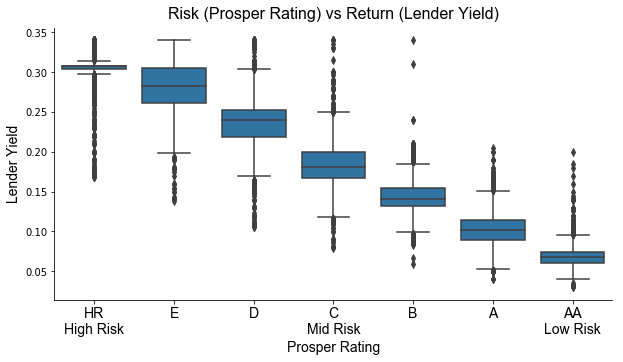

In [44]:
plt.figure(figsize=(10,5))
ax=sb.boxplot(data=loans_post2009, x='ProsperRating (Alpha)', y='LenderYield', color=base_colour)
plt.xlabel('Prosper Rating', fontdict=axis_font)
plt.ylabel('Lender Yield', fontdict=axis_font)
plt.title('Risk (Prosper Rating) vs Return (Lender Yield)', fontdict=title_font)
ax.set_xticks(PRating_xlocs)
ax.set_xticklabels(PRating_Risk, minor=False, fontdict=axis_font)
sb.despine();

Lender Yield is positively related to Prosper Rating, with a higher yield for higher risk loans (E, HR) and a lower yield for low risk Loans (AA, A).  This is in line with the concept of return compensating for risk taken.

The interquartile range of Lender Yield, other than HR loans, seems to also be somewhat positively related to the Prosper Rating with a smaller range for low risk AA rated loans and a greater interquartile range for high risk E rated loans.  

Due to the large amount of overlapping outliers between the Ratings,there seems to be other factors, other than Prosper Rating, that determines the risk and therefore the return on investment. 

#### Yield vs. Loan Performance

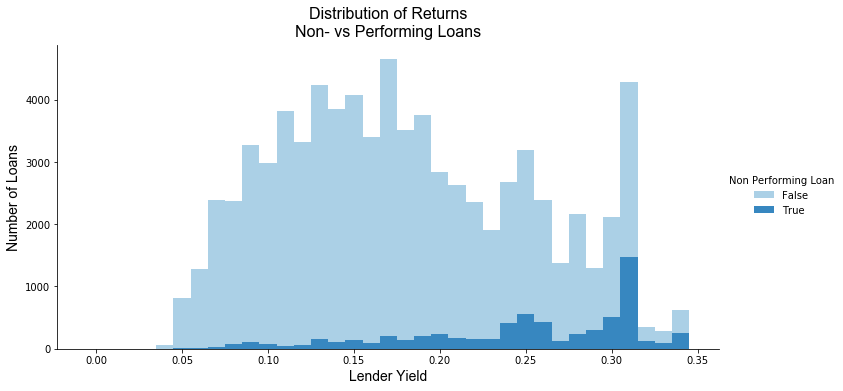

In [45]:
bin_edges = np.arange(-0.005,loans_post2009['LenderYield'].max()+0.01, 0.01)
g=sb.FacetGrid(data=loans_post2009, hue='NonPerfLoan', height=5, aspect=2, palette=base_palette, legend_out=True)
g.map(plt.hist,'LenderYield', bins=bin_edges)
g.add_legend(title=('Non Performing Loan'))
plt.xlabel('Lender Yield', fontdict=axis_font)
plt.ylabel('Number of Loans', fontdict=axis_font)
plt.title('Distribution of Returns\nNon- vs Performing Loans', fontdict=title_font);

- The frequency of Non-performing loans for yields up to 23% is relatively stable compared to the overall distribution of loans.  
- From about yield of 18%, given that the number of loans is declining, other than spikes at 25% and 31%, the proportion of non- to performing loans increases as yield increases.
- Loans with yield 31% and higher have a high incidence of non performance

#### Yield vs. Net Principal Loss

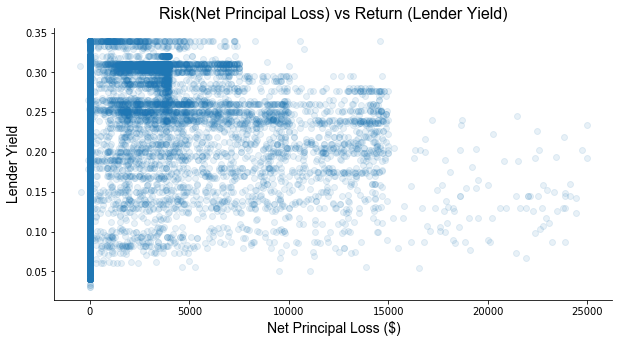

In [46]:
plt.figure(figsize=(10,5))
sb.regplot(data=loans_post2009, x='LP_NetPrincipalLoss', y='LenderYield', 
          fit_reg=False,
           scatter_kws={'alpha':1/10})
plt.xlabel('Net Principal Loss ($)', fontdict=axis_font)
plt.ylabel('Lender Yield', fontdict=axis_font)
plt.title('Risk(Net Principal Loss) vs Return (Lender Yield)', fontdict=title_font)
sb.despine();

There are more losses by count at the higher yields. Outliers of Net Principal Loss( that is larger dollar losses) occur at yields 25% or less.  The median yield for D loans is just under 25%, with thus the lower risk loans returning less than 25%. 

Incidence of losses decreases significantly for losses greater than `$`15k 

###### Conclusion:
- Higher risk loans (at rates greater than 25%) may be ineligible for loans greater than `$`15K
- Borrowers with less risk and thus eligible for both lower rates and larger loans can cause the greatest losses in dollar terms.

### Investment Opportunities
With the knowledge that Prosper loans does indeed compensate the investor for bearing the risk of potential loss, the analysis explores the investment opportunities, that is whether there is a viable loan market that an investor could immediately participate in. 

#### Distribution of Loans over Time by Prosper Rating

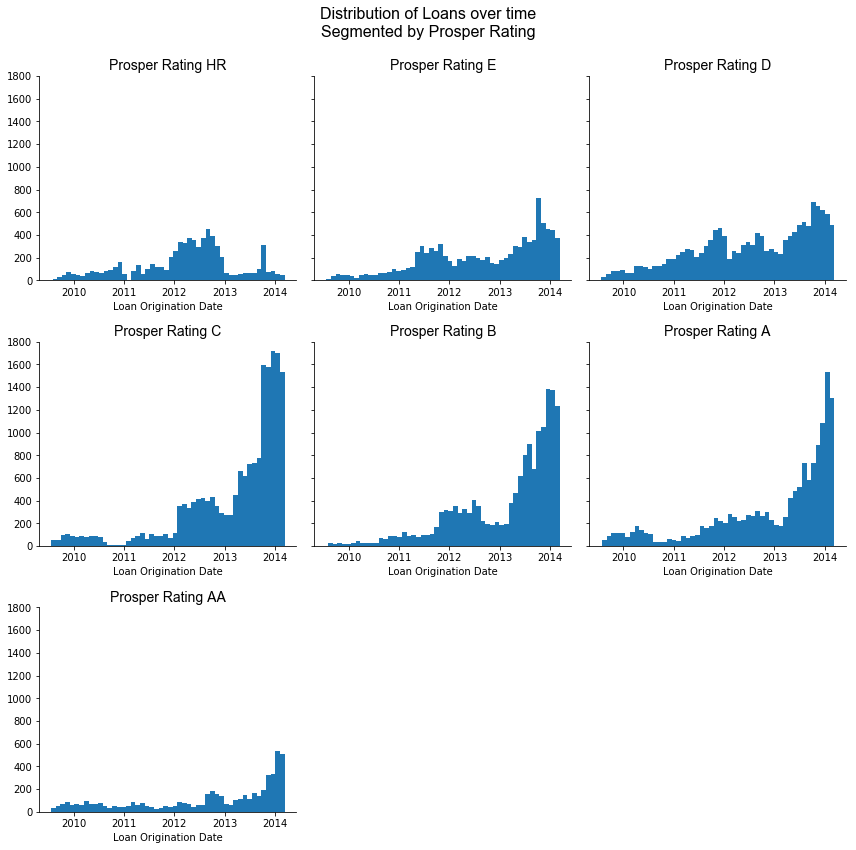

In [47]:
g=sb.FacetGrid(data=loans_post2009, col='ProsperRating (Alpha)', col_wrap=3, height=4)
g.map(plt.hist,'LoanOriginationDate', bins=50)

g.set(xlabel='Loan Origination Date')
g.set_titles('Prosper Rating {col_name}', fontdict=axis_font, size=14)

for ax in g.axes.flat:
    _ = plt.setp(ax.get_xticklabels(), visible=True)
    
plt.subplots_adjust(top=0.9, hspace=0.3)
g.fig.suptitle('Distribution of Loans over time\nSegmented by Prosper Rating', fontdict=title_font, fontsize=16);

From 2013 onwards, the trend for high risk HR loans has diverged from that of the other rated loans with a marked decrease in the number of loans and flat growth, other than a spike late 2013.  Other ratings have experienced positive growth in that same period.    

Mid risk C-rated loans have experienced the greatest growth over the last 2 years followed by mid-to-low risk B and A loans.  
Perhaps there has been 
- a change in eligibility criteria for loans
- change in the rating system
- a change in business model to concentrate the market on mid-higher rated loans
- changes in the general economic environment that resulted in the mid-rated market (ie those in the C-rated population) seeking alternative borrowing avenues

There has thus been growth in the Prosper Loans market with investment opportunities in mid-to-low risk C, B and A rated loans.  There are opportunities in higher risk D and E rated  and the lowest risk AA rated investments but not to the extent of the C, B and A loans.  Furthermore, there is fairly little opportunity to invest in the High Risk HR loans which has not seen much growth in the Prosper Loans Markert

#### Loan Amount by Prosper Rating

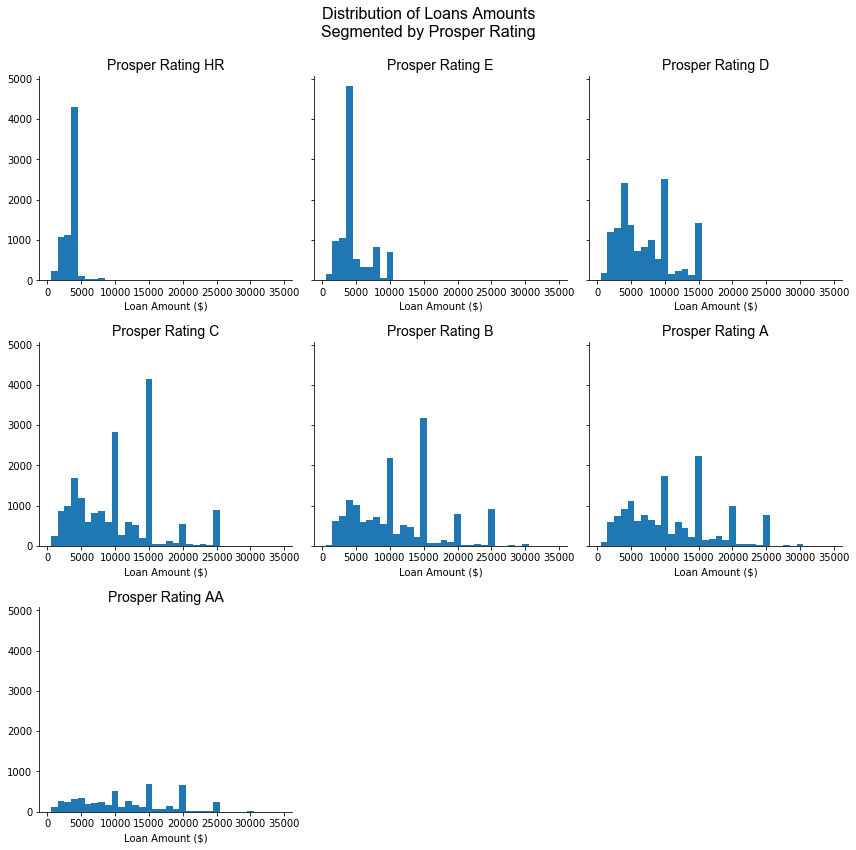

In [48]:
bin_edges=np.arange(500,loans_post2009['LoanOriginalAmount'].max()+500,1000)
major_ticks=np.arange(0,loans_post2009['LoanOriginalAmount'].max()+1000,5000)
minor_ticks=np.arange(0,loans_post2009['LoanOriginalAmount'].max()+1000,1000)

g=sb.FacetGrid(data=loans_post2009, col='ProsperRating (Alpha)', col_wrap=3, height=4)
g.map(plt.hist,'LoanOriginalAmount', bins=bin_edges)

g.set(xlabel='Loan Amount ($)')
g.set_titles('Prosper Rating {col_name}', fontdict=axis_font, size=14)

for ax in g.axes.flat:
    _ = plt.setp(ax.get_xticklabels(), visible=True)
    
plt.subplots_adjust(top=0.9, hspace=0.3)
g.fig.suptitle('Distribution of Loans Amounts\nSegmented by Prosper Rating', fontdict=title_font, fontsize=16);

From this chart we can see how a borrower's Prosper Rating affects the amount they can borrow.  
- HR loans seems to effectively cut out at `$`4,000, 
- E loans cut out at `$`10k, but showing that there must be some further eligibility requirements in order to borrow greater than `$`4,000.  
- D loans cut out at `$`15k, with peaks at `$`4,000, `$`10k and `$`15k
- C, B, A and AA loans seem to have similar distribution features - increasing frequency of loans to a moderate level at `$`4,000, and decreasing frequency for amounts after that other than the peaks.  The peaks at `$`4k, `$`10k, `$`15k, `$`20k and `$`25k  have its own distribtuion, almost like a sparse bell shape, peaking at `$`15k  The main difference between the distribution of Loans between the Ratings is the height,with C loans the highest, followed by B, A then AA.  
- The number of AA loans is comparatively quite small, possibly suggesting that high credit-worthy borrowers have access to and possibly prefer other borrowing institutions and marketplaces. 

In terms of investment, the highest risk loan of HR and E, provide opportunities of `$`4,000 investments while the mid-to-low risk C, B and A rated loans frequently provide `$`15k investment opportunities

### How does Prosper Rating relate to Risk Metrics
This section returns to the exploration of risk in how the Prosper Ratings relate to previously explored risk metrics.  In terms of investment does the Prosper Rating adequately encompass the predictive risk indicators of the risk metrics of interest    

Prosper Rating vs.
- Credit Score Mean
- Debt-to-Income Ratio
- Income Range
- Stated Monthly Income
- Inquiries Last 6 months

As in previous sections, the Prosper Ratings will be referenced in terms of their risk level. That is:
- **HR** rating is **high** risk
- **C*** rating is **mid** risk
- **AA** rating is **low** risk


###### Prosper Rating vs Credit Score Mean

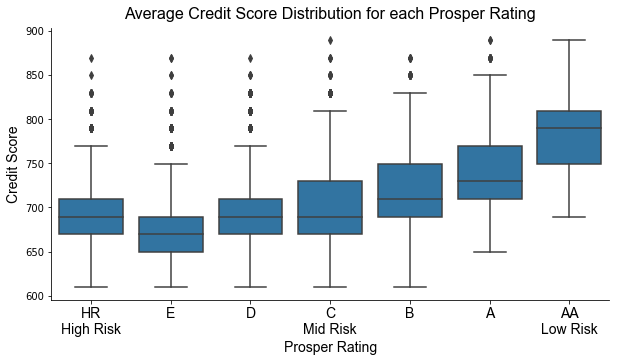

In [49]:
plt.figure(figsize=(10,5))
ax=sb.boxplot(data=loans_post2009, x='ProsperRating (Alpha)', y='CreditScoreMean', color=base_colour)
ax.set_xticks(PRating_xlocs)
ax.set_xticklabels(PRating_Risk, minor=False, fontdict=axis_font)
plt.xlabel('Prosper Rating', fontdict=axis_font)
plt.ylabel('Credit Score', fontdict=axis_font)
plt.title('Average Credit Score Distribution for each Prosper Rating', fontdict=title_font)
sb.despine();

The Prosper Rating does to some extent inversely correlate with the mean Credit score - Higher credit scores correlate with lower risk Prosper Rating (AA).

It is however interesting that the High Risk HR Prosper Ratings coincides with a higher median Mean Credit Score than Prosper Rating E, and is at the same levels as D and C loans.  

Additionally, the median Mean Credit Score of B and A doesn't appear significantly higher than the credit scores of the higher risk Prosper Ratings C to HR

For the mid-to-high risk Prosper Ratings B-HR, the lower end of the Mean Credit Score range cuts out at just over 600

Also of interest are the outliers for the higher risk Prosper Rates (D-HR).  These outliers, on face value, could be part of the lower risk population.  For example, Rating E has outliers starting from around Credit Score 750 up to 925.  These scores fall comfortably within the AA range and almost in the A Range, with the lower outliers for E falling within the AA interquartile range.  

###### Conclusion:
Other than AA and for the most part A ratings, Credit Score is not the main determinant of Prosper Rating allocation.  

###### Prosper Rating vs. Debt to Income Ratio

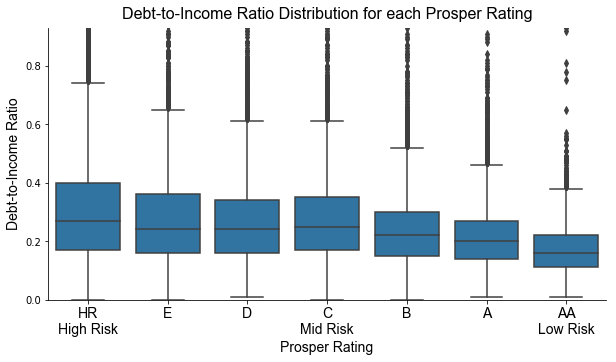

In [50]:
plt.figure(figsize=(10,5))
ax=sb.boxplot(data=loans_post2009, x='ProsperRating (Alpha)', y='DebtToIncomeRatio', color=base_colour)
plt.ylim(loans_post2009['DebtToIncomeRatio'].min(),loans_post2009['DebtToIncomeRatio'].describe([0.995])['99.5%'])
ax.set_xticks(PRating_xlocs)
ax.set_xticklabels(PRating_Risk, minor=False, fontdict=axis_font)
plt.xlabel('Prosper Rating', fontdict=axis_font)
plt.ylabel('Debt-to-Income Ratio', fontdict=axis_font)
plt.title('Debt-to-Income Ratio Distribution for each Prosper Rating', fontdict=title_font)
sb.despine();

- In terms of range, there is an positive relationship between Prosper Ratings and Debt-to-Income ratios, with a smaller spread for low risk (AA, A) Prosper Ratings and wider spread for the high risk Prosper Ratings (eg. HR) 
- The median Debt to Income Ratio is in the range 20% to upper 20% for Prosper Ratings from A to HR.  
- The interquartile range for C-E Debt-to-Income is quite similar. 

###### Conclusion:
For the lowest risk AA, A and B Prosper Ratings, Debt-to-Income does seem to be an important determinant of rating allocation.  For the higher risk C to HR ratings, there appears to be other factors determining rating allocation. 

##### Prosper Rating vs. Income Range

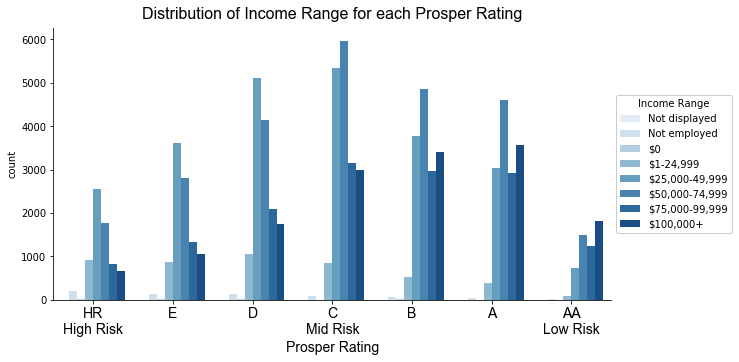

In [51]:
plt.figure(figsize=(10,5))
ax=sb.countplot(data=loans_post2009, x='ProsperRating (Alpha)', hue='IncomeRange', palette=base_palette);
ax.legend(loc=6, bbox_to_anchor=(1,0.5),framealpha=1, title='Income Range')
ax.set_xticks(PRating_xlocs)
ax.set_xticklabels(PRating_Risk, minor=False, fontdict=axis_font)
plt.xlabel('Prosper Rating', fontdict=axis_font)
plt.ylabel('count')
plt.title('Distribution of Income Range for each Prosper Rating', fontdict=title_font)
sb.despine();

Within each Prosper Rating grouping, there appears that all income ranges are accounted for.  

Other than the AA rating, the mid to low risk Prosper Ratings of C-A have an income `$`50k-75k most frequently reported.  

For the higher risk D to HR Prosper Ratings, an income range of `$`25k-50k is most frequently reported

Of interest is the reported high income ranges (`$`75k+) in the high risk D-HR Prosper Ratings  and low income ranges (<`$`25k) in the mid-to-low risk C-AA Prosper Ratings.

As Prosper Rating has across the board income ranges coupled with the fact that income range is self reported, perhaps this variable does not have such a large weighting in determining Prosper Rating allocation.

##### Prosper Rating vs. Stated Monthly Income

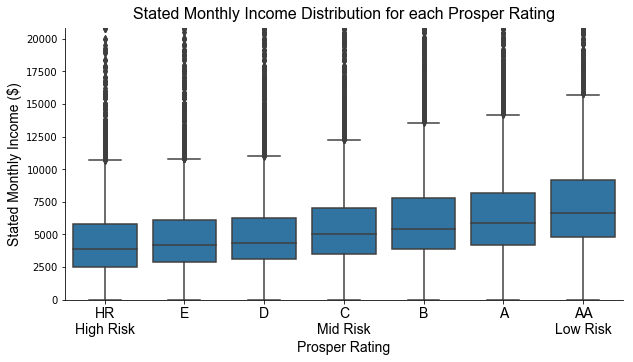

In [52]:
plt.figure(figsize=(10,5))
ax=sb.boxplot(data=loans_post2009, x='ProsperRating (Alpha)', y='StatedMonthlyIncome', color=base_colour)
plt.ylim(loans_post2009['StatedMonthlyIncome'].min(),loans_post2009['StatedMonthlyIncome'].describe([0.99])['99%'])
ax.set_xticks(PRating_xlocs)
ax.set_xticklabels(PRating_Risk, minor=False, fontdict=axis_font)
plt.xlabel('Prosper Rating', fontdict=axis_font)
plt.ylabel('Stated Monthly Income ($)', fontdict=axis_font)
plt.title('Stated Monthly Income Distribution for each Prosper Rating', fontdict=title_font)
sb.despine();

There is an inverse relationship between Stated Monthly Income and Prosper Rating with a lower monthly income for higher risk HR-D Prosper Ratings and a higher monthly income for lower risk A-AA Prosper Rating.

Stated Monthly Income is self reported


###### Prosper Rating vs. Inquiries Last 6 Months

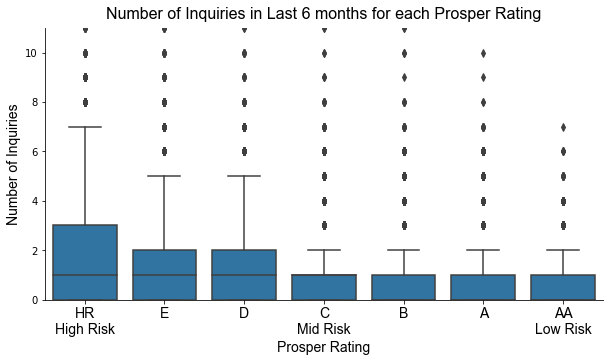

In [53]:
plt.figure(figsize=(10,5))
ax=sb.boxplot(data=loans_post2009, x='ProsperRating (Alpha)', y='InquiriesLast6Months', color=base_colour);
plt.ylim(0,loans_post2009['InquiriesLast6Months'].describe([0.999])['99.9%'])
ax.set_xticks(PRating_xlocs)
ax.set_xticklabels(PRating_Risk, minor=False, fontdict=axis_font)
plt.xlabel('Prosper Rating', fontdict=axis_font)
plt.ylabel('Number of Inquiries', fontdict=axis_font)
plt.title('Number of Inquiries in Last 6 months for each Prosper Rating', fontdict=title_font)
sb.despine();

Prosper's lending criteria requires less than 5 Credit Bureau inquiries.  Across all Prosper Ratings, there have been outliers greater than 5, with the upper range limit of Rating HR already at 7 Inquiries in the last 6 months.  

The distribution of Inquiries in the last 6 months:
- is similar from AA to C rating, with 75% having 1 or less inquiries, and upper range limit of 2 inquiries.  C rating has however a longer tail of outliers compared to AA, but not so different to A and B ratings.
- is  similar for D and E Prosper ratings

HR has the same median number of inquiries of 1 as rating E and D, but a larger range.

##### Conclusion:
Number of inquiries in the last 6 months separates the mid-to-low risk Prosper Ratings (C-AA) from the higher risk ratings (D-HR)

### Distribution of Non-Performing Loans over Investment Options
This section explores any patterns or trends of non-performing loans in the framework of previously explored investment options
- Loan Amount
- Loan Purpose
- Term

#### Loan Amount

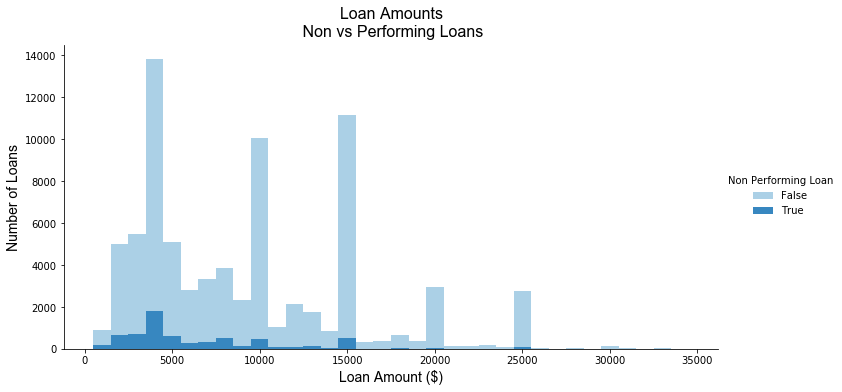

In [54]:
bin_edges=np.arange(500,loans_post2009['LoanOriginalAmount'].max()+500,1000)
g=sb.FacetGrid(data=loans_post2009, hue='NonPerfLoan', height=5, aspect=2, palette=base_palette, legend_out=True)
g.map(plt.hist,'LoanOriginalAmount', bins=bin_edges)
g.add_legend(title=('Non Performing Loan'))
plt.xlabel('Loan Amount ($)', fontdict=axis_font)
plt.ylabel('Number of Loans', fontdict=axis_font)
plt.title('Loan Amounts\n Non vs Performing Loans', fontdict=title_font);

- The distribution of Non-Performing Loans is consistent with the overall distiribution of Loan amount.  
- The peak at `$`4,000 for non-performing loans is not as extreme as the overall peak for all loans.  
- The number of non-performing loans at `$`10k is proportionally smaller to the Performing loans as compared to non- and performing loans at `$`8k.

#### Loan Purpose

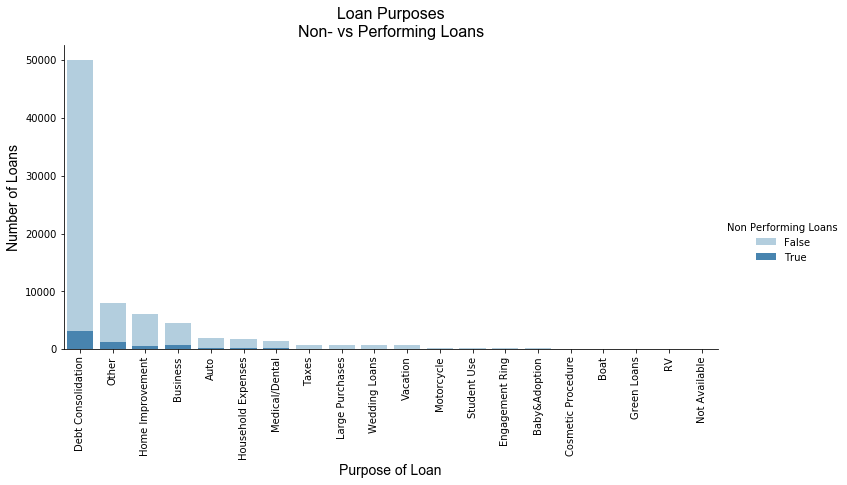

In [55]:
g=sb.FacetGrid(data=loans_post2009, hue='NonPerfLoan', height=5, aspect=2, legend_out=True, palette=base_palette)
g.map(sb.countplot,'ListingCategory (numeric)', hue_order=[False,True],order=tick_props)
g.set_xticklabels(tick_list, rotation=90)
plt.xlabel('Purpose of Loan', fontdict=axis_font)
plt.ylabel('Number of Loans', fontdict=axis_font)
g.add_legend(title='Non Performing Loans')
plt.title('Loan Purposes\nNon- vs Performing Loans', fontdict=title_font);

Relative to Debt Consolidation, the ratio of Non-Performing to Performing loans for 'Other', 'Home Improvement' and  'Business' seem high, but due to the disparity between number of loans for Debt Consolidation and the other Loan Purposes, this may be a difficult avenue to pursue.

#### Term

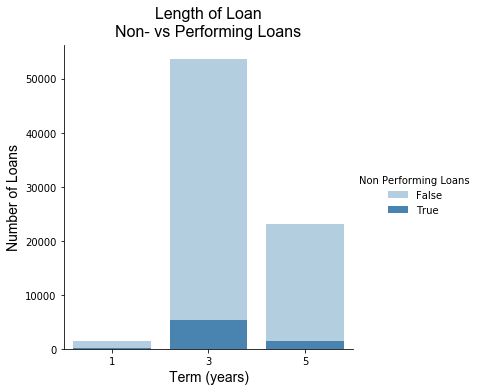

In [56]:
g=sb.FacetGrid(data=loans_post2009, hue='NonPerfLoan', height=5, palette=base_palette, legend_out=True)
g.map(sb.countplot,'Term', hue_order=[False,True], order=[12,36,60])
g.add_legend(title='Non Performing Loans')
plt.xlabel('Term (years)', fontdict=axis_font)
g.set_xticklabels(labels=['1','3','5'])
plt.ylabel('Number of Loans', fontdict=axis_font)
plt.title('Length of Loan\nNon- vs Performing Loans', fontdict=title_font);

Contrary to expectations, the ratio of non-performing to performing loans is not significantly high for the longer term of 5 years.  Interestingly even though a longer term would mean an investment has more opportunities to go in default, this is not the experience in the Prosper Loan marketplace 

### Distribution of Non-Performing Loans over Risk Predictors
This section explores trends or patterns of non-performing loans in the framework of risk predictors of interest
- Prosper Rating
- Credit Score
- Number of Inquiries in the last 6 months
- Debt-to-Income Ratio
- Occupation
- Income
    - Income Range
    - Stated Monthly Income
- Monthly Loan Payment


#### Prosper Rating

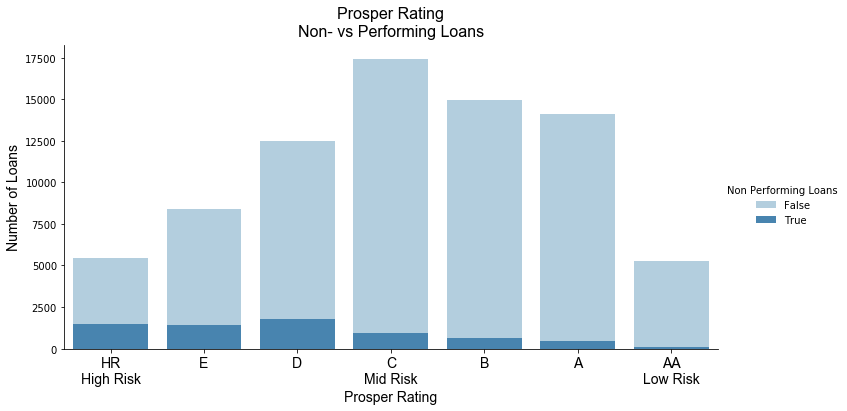

In [57]:
g=sb.FacetGrid(data=loans_post2009, hue='NonPerfLoan',height=5, aspect=2, palette=base_palette, legend_out=True)
g.map(sb.countplot,'ProsperRating (Alpha)', order=PRating)
g.add_legend(title='Non Performing Loans')
g.ax.set_xticks(PRating_xlocs)
g.ax.set_xticklabels(PRating_Risk, minor=False, fontdict=axis_font)
plt.xlabel('Prosper Rating', fontdict=axis_font)
plt.ylabel('Number of Loans', fontdict=axis_font)
plt.title('Prosper Rating\nNon- vs Performing Loans', fontdict=title_font);

Prosper Ratings give a decent indication of the possibility of a non-performing loan with the frequency of non-performing loans showing in the right direction, that is higher frequency for high risk, D-HR Prosper Ratings and lower frequency for lower risk AA-B Prosper Ratings.

Interestingly, the frequency of Non-Performing Loans is quite similar for the high risk D-HR Prosper Ratings, despite the varied frequency of loans for each Rating.  The ratio of Non- to performing loans is thus consistent with the step in rating, with a higher ratio for the higher risk HR Rating and a lower ratio for the D Prosper Rating.

For the mid-to-low risk C to A ratings, the frequency of Non-Performing loans is again quite similar given the varied frequency of loans for each rating.  Unlike with the higher risk Ratings, the ratio of Non- to Performing Loans for the lower risk A Rating is higher compared to the slighlty higher risk C rating.  



#### Credit Score

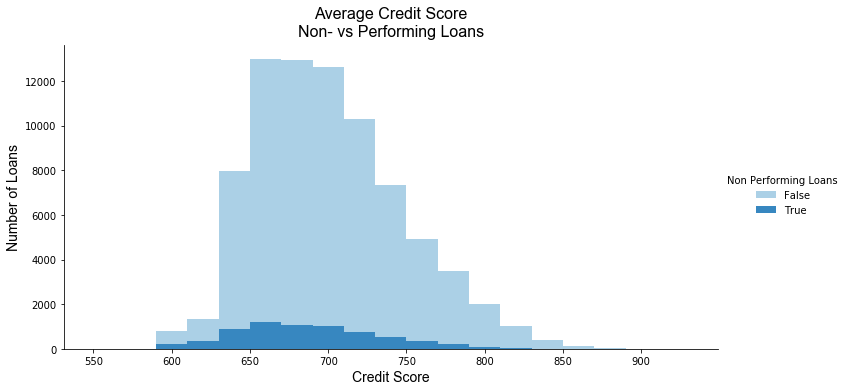

In [58]:
bin_edges = np.arange(600-50, loans_post2009['CreditScoreMean'].max()+50,20)
g=sb.FacetGrid(data=loans_post2009, hue='NonPerfLoan', height=5, aspect=2, palette=base_palette, legend_out=True)
g.map(plt.hist,'CreditScoreMean', bins=bin_edges)
g.add_legend(title='Non Performing Loans')
plt.xlabel('Credit Score', fontdict=axis_font)
plt.ylabel('Number of Loans', fontdict=axis_font)
plt.title('Average Credit Score\nNon- vs Performing Loans', fontdict=title_font);

The distribution of Non Performing Loans is consistent with the distribution of all loans, however the peak is not as pronounced as that of the Performing loans, and the left tail is taller.  This is consistent with lower credit scores being higher risk.

#### Number of Inquiries in the Last 6 Months

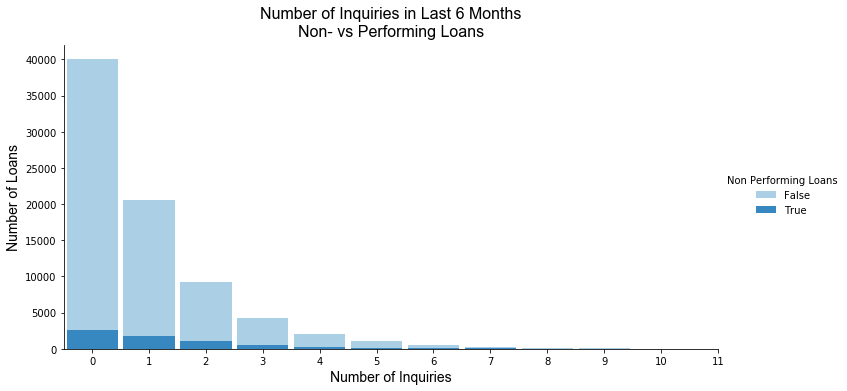

In [59]:
bin_edges=np.arange(-0.5, loans_post2009['InquiriesLast6Months'].max()+1,1)
g=sb.FacetGrid(data=loans_post2009, hue='NonPerfLoan', height=5, aspect=2, palette=base_palette, legend_out=True)
g.map(plt.hist,'InquiriesLast6Months', bins=bin_edges, rwidth=0.9 )
g.add_legend(title='Non Performing Loans')
g.set(xlim=(-.5, loans_post2009['InquiriesLast6Months'].describe([.999])['99.9%']),
      xticks=(np.arange(0,11+1,1)))
plt.xlabel('Number of Inquiries', fontdict=axis_font )
plt.ylabel('Number of Loans', fontdict=axis_font)
plt.title('Number of Inquiries in Last 6 Months\nNon- vs Performing Loans', fontdict=title_font);

Proportionally, the number of non-performing loans for 1+ inquiries in the last 6 months is quite high compared to that of 0 inquiries.

Number of inquiries would therefore be a useful filter when selecting an investment in Prosper Loans, filtering out loans with 1+ inquiries in the last 6 months to lower the risk of a non-performing loan

#### Debt-to-Income Ratio

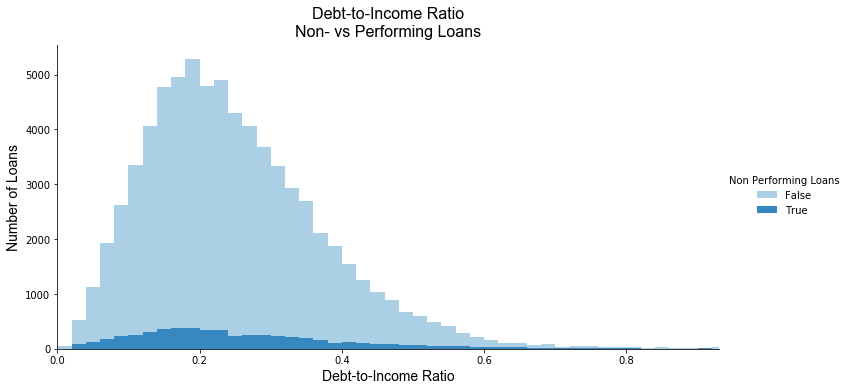

In [60]:
bin_edges = np.arange(0, loans_post2009['DebtToIncomeRatio'].max()+0.02, 0.02)
g=sb.FacetGrid(data=loans_post2009, hue='NonPerfLoan', height=5, aspect=2, palette=base_palette, legend_out=True)
g.map(plt.hist,'DebtToIncomeRatio', bins=bin_edges )
g.set(xlim=(0,loans_post2009['DebtToIncomeRatio'].describe([0.995])['99.5%']))
plt.xlabel('Debt-to-Income Ratio', fontdict=axis_font)
plt.ylabel('Number of Loans', fontdict=axis_font)
g.add_legend(title='Non Performing Loans')
plt.title('Debt-to-Income Ratio\nNon- vs Performing Loans', fontdict=title_font);

The distribution of Non-Performing loans is flatter across Debt-to-Income ratios compared with Performing loans.  Both peak at around 20%, but while Performing Loans show a pronounced decrease in frequency as the Debt-to Income ratio increases, the Non-Performing loans remains at the elevated level.

Looking at the chart, the optimal debt-to-income is about 20%, where the proportion of non-to performing loans is at its lowest.  Perhaps high debt-to-income ratios can cause financial hardship due to inability to pay debts, whereas low debt-to-income ratios suggests the borrower is not as experienced managing debt and non-payments might be due to money mismanagement issues

#### Occupation

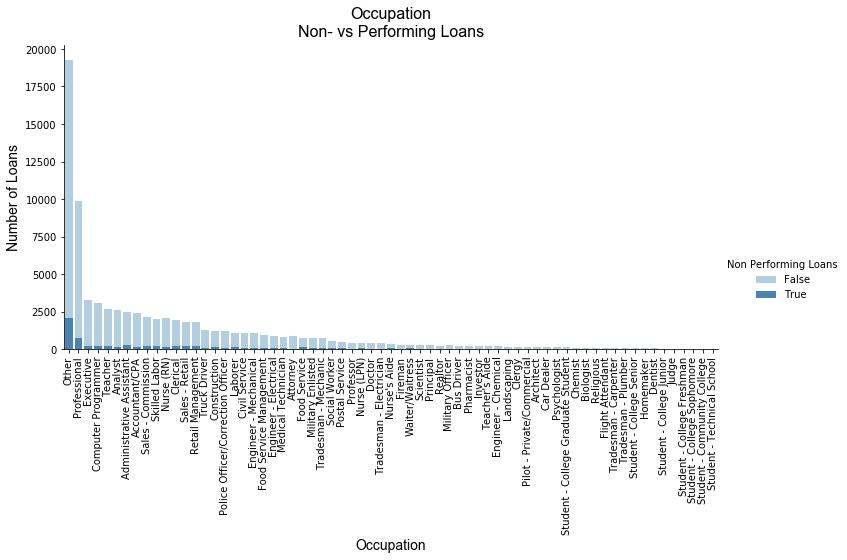

In [61]:
g=sb.FacetGrid(data=loans_post2009, hue='NonPerfLoan', height=5, aspect=2, palette=base_palette, legend_out=True)
g.map(sb.countplot,'Occupation', hue_order=[False,True], order=occ_order)
g.set_xticklabels(rotation=90)
plt.xlabel('Occupation', fontdict=axis_font)
plt.ylabel('Number of Loans', fontdict=axis_font)
g.add_legend(title='Non Performing Loans')
plt.title('Occupation\nNon- vs Performing Loans', fontdict=title_font);

About 10% of loans where the occupation is 'Other' are non-performing.  

#### Income Range

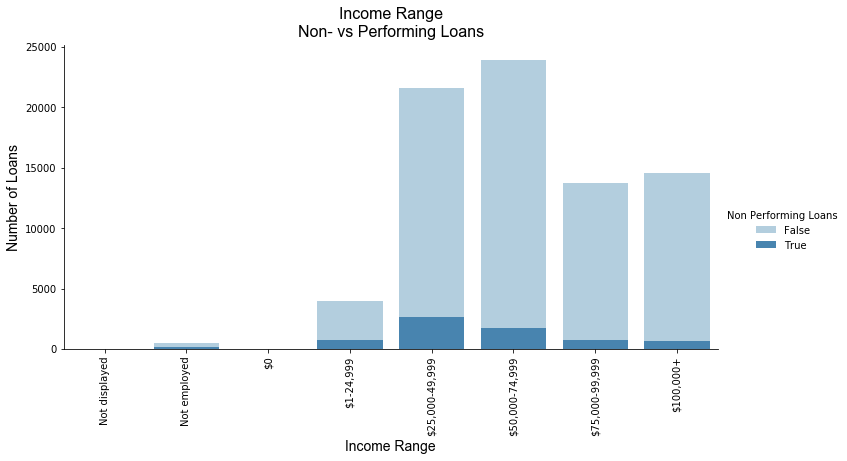

In [62]:
g=sb.FacetGrid(data=loans_post2009, hue='NonPerfLoan', height=5, aspect=2, palette=base_palette, legend_out=True)
g.map(sb.countplot,'IncomeRange', hue_order=[False,True], order=IncRange);
g.set_xticklabels(rotation=90)
plt.xlabel('Income Range', fontdict=axis_font)
plt.ylabel('Number of Loans', fontdict=axis_font)
g.add_legend(title='Non Performing Loans')
plt.title('Income Range\nNon- vs Performing Loans', fontdict=title_font);

There is a higher frequency of Non Performing Loans for the Income Range `$`25k-`$`50k

#### Stated Monthly Income

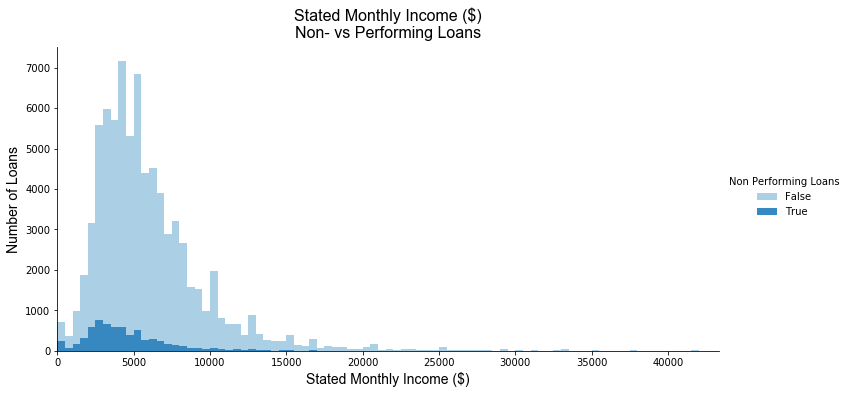

In [63]:
bin_edges= np.arange(0,loans_post2009['StatedMonthlyIncome'].max()+500,500)
g=sb.FacetGrid(data=loans_post2009, hue='NonPerfLoan', height=5, aspect=2, palette=base_palette, legend_out=True)
g.map(plt.hist,'StatedMonthlyIncome', bins=bin_edges);
g.set(xlim=(0, loans_post2009['StatedMonthlyIncome'].describe([0.999])['99.9%']))
plt.xlabel('Stated Monthly Income ($)', fontdict=axis_font)
plt.ylabel('Number of Loans', fontdict=axis_font)
g.add_legend(title='Non Performing Loans')
plt.title('Stated Monthly Income ($)\nNon- vs Performing Loans', fontdict=title_font);

The distribtuion of the Non Performing Loans is similarly distributed to the general set of loans - normal distribution with a right skew.
- The frequency of non performing loans is relatively high for monthly income `$`0-500 (the very first peak), relative to other income levels
- The peak in the distribution of non-performing loans appears at a lower monthly income (`$`3,000) than the peak of the general population of loans at `$`4,000.  Therefore the ratio of non-performing to performing loans are higher for monthly incomes up to `$`3,000

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

**Lender Yield vs. Prosper Rating**
Lender Yield correlates with Prosper Rating appropriately, as in higher yield compensate for higher risk Prosper Ratings such as D-HR and vice versa.  There are however  many overlapping outlier Lender Yields between the Ratings, suggesting there are other factors, other than Prosper Rating, that determine the risk and therefore the return on investment. 

**Prosper Rating vs Non-Performing Loans**
The frequency of Non-Performing Loans is quite similar for the high risk D-HR Prosper Ratings, despite the varied frequency of loans for each Rating. A higher ratio of non- to performing loans for the higher risk HR Rating and a lower ratio for the D Prosper Rating is observed

For the mid-to-low risk C to A ratings, the frequency of Non-Performing loans is again quite similar despite the varied frequency of loans for each rating.  Unlike with the higher risk Ratings, the ratio of Non- to Performing Loans for the lower risk A Rating is higher compared to the slighlty higher risk C rating. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Prosper Ratings relate appropriately with the risk metrics of interest given that they are inputs in the allocation process.  It is however difficult to conclude exactly how much weight each metric has in determining the rating.

- **Credit Score** For the most part Credit Score correlates with the Prosper Rating - high credit score coinicides with low risk ratings.  However given the overlap in ranges and outliers and similarity in medians, other than AA and for the most part A ratings, Credit Score is not the main determinant of Prosper Rating allocation
- **Debt-to_income** For the lowest risk AA, A and B Prosper Ratings, Debt-to-Income does seem to be an important determinant of rating allocation.  For the higher risk C to HR ratings, there appears to be other factors determining rating allocation.  Furthermore, the optimal debt-to-income ratio is about 20%, where the proportion of non-to performing loans is at its lowest.  Perhaps high debt-to-income ratios can cause financial hardship due to inability to pay debts, whereas low debt-to-income ratios suggests the borrower is not as experienced managing debt and non-payments might be due to money mismanagement issues
- **Income Range** Each Prosper Rating has across the board income ranges coupled with the fact that income range is self reported, perhaps this variable does not have such a large weighting in determining Prosper Rating allocation
- **Number of inquiries in the last 6 months** separates the mid-to-low risk Prosper Ratings (C-AA) from the higher risk ratings (D-HR).  Furthermore, proportionally, the number of non-performing loans for 1+ inquiries in the last 6 months is quite high compared to that of 0 inquiries.




## Multivariate Exploration
This section further explores the Risk-Reward tradeoff of Prosper Loans as well as other considerations for investment strategy

### Investment Strategy Considerations
#### Term Risk

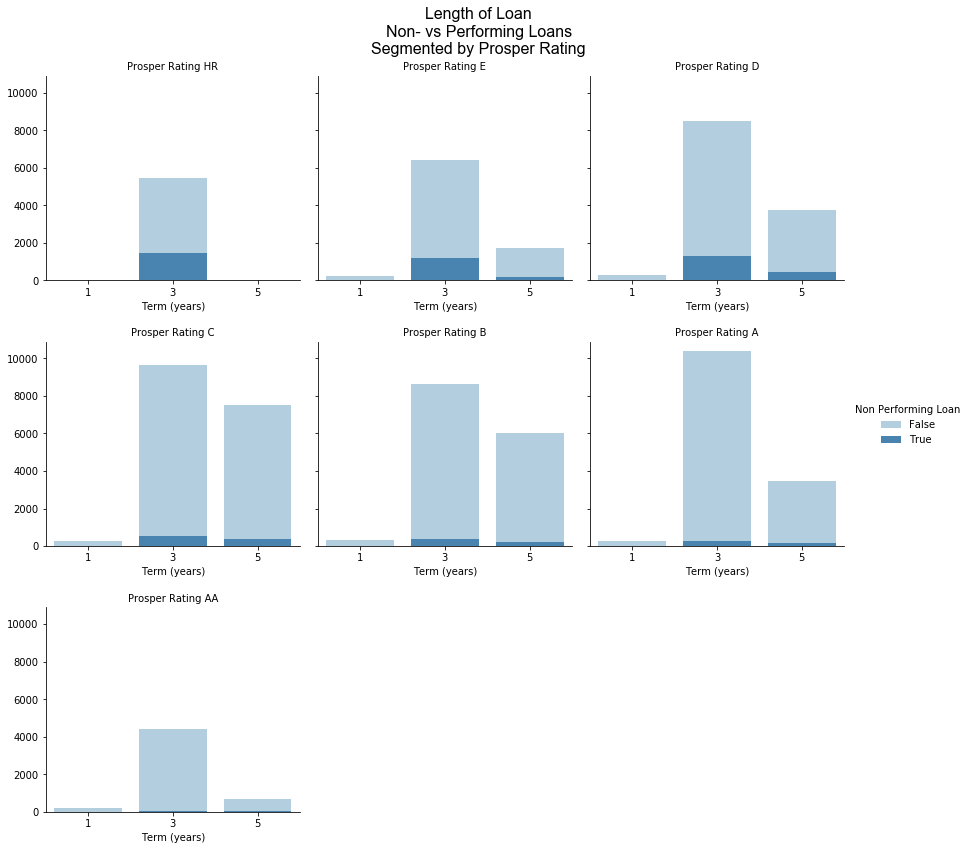

In [64]:
g=sb.FacetGrid(data=loans_post2009, col='ProsperRating (Alpha)',hue='NonPerfLoan',
               palette=base_palette,col_wrap=3, height=4, legend_out=True)
g.map(sb.countplot,'Term', hue_order=[False,True], order=[12,36,60])

g.set(xlabel='Term (years)')
g.set_xticklabels(labels=['1','3','5'])


g.set_titles('Prosper Rating {col_name}')

for ax in g.axes.flat:
    _ = plt.setp(ax.get_xticklabels(), visible=True)
    
plt.subplots_adjust(top=0.9, hspace=0.3)
g.fig.suptitle('Length of Loan\nNon- vs Performing Loans\nSegmented by Prosper Rating', fontdict=title_font, fontsize=16)
g.add_legend(title='Non Performing Loan');

Other than mid risk B and C Prosper Ratings, the clear preference for loan term is  3 years.  It appears that high risk HR Prosper Rating may not be eligible to borrow for the longer 5 year term, possibly due to that larger time window giving more opportunities to default.  

Proportionately, there are more non-performing loans for 3 year terms of high risk D to HR loans compared to the mid-to-low risk C to AA loans

#### Non- and Performing Loans over time 

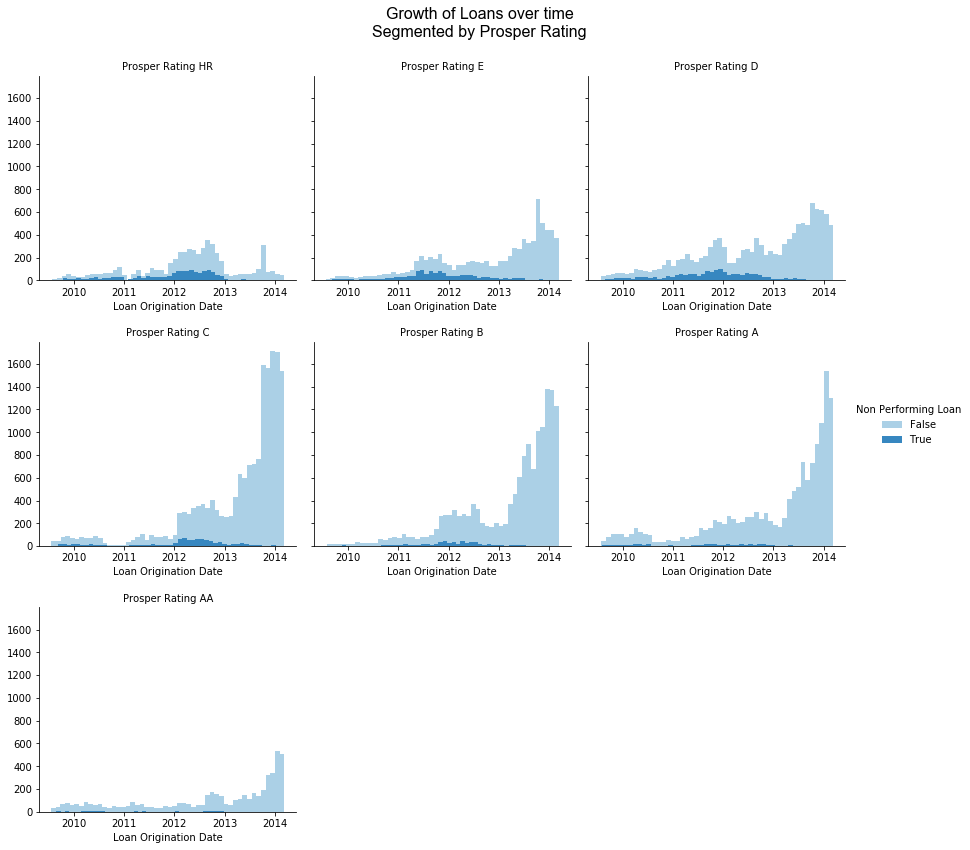

In [65]:
g=sb.FacetGrid(data=loans_post2009, col='ProsperRating (Alpha)',hue='NonPerfLoan',
               palette=base_palette,col_wrap=3, height=4, legend_out=True)
g.map(plt.hist,'LoanOriginationDate', bins=50)

g.set(xlabel='Loan Origination Date')
g.set_titles('Prosper Rating {col_name}')

for ax in g.axes.flat:
    _ = plt.setp(ax.get_xticklabels(), visible=True)
    
plt.subplots_adjust(top=0.9, hspace=0.3)
g.fig.suptitle('Growth of Loans over time\nSegmented by Prosper Rating', fontdict=title_font, fontsize=16)
g.add_legend(title='Non Performing Loan');

The trend of non-performing loans is opposite to the growth of performing loans over time.  Across all Prosper Ratings, the number of non-performing loans has decreased significantly over time since the growth period in 2012.

### Risk vs Return Analysis

#### Risk (Non-Performing Loan) vs Return (Lender Yield)

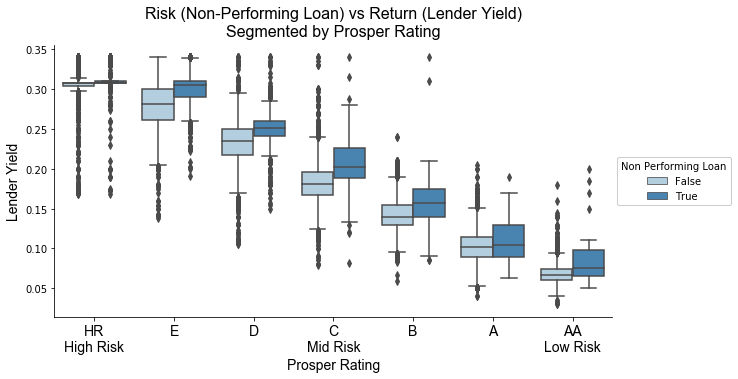

In [66]:
plt.figure(figsize=(10,5))
ax=sb.boxplot(data=loans_post2009, x='ProsperRating (Alpha)', y='LenderYield', hue='NonPerfLoan',
           palette=base_palette)
ax.legend(loc=6, bbox_to_anchor=(1,0.5),framealpha=1, title='Non Performing Loan')
ax.set_xticks(PRating_xlocs)
ax.set_xticklabels(PRating_Risk, minor=False, fontdict=axis_font)
plt.xlabel('Prosper Rating', fontdict=axis_font)
plt.ylabel('Lender Yield',fontdict=axis_font )
plt.title('Risk (Non-Performing Loan) vs Return (Lender Yield)\nSegmented by Prosper Rating', fontdict=title_font)
sb.despine();


Across all Prosper Ratings except A, the median Lender Yield for non-performing loans was higher than the lender yield for performing loans, suggesting risk is being compensated with a higher return, even within each Prosper Rating groups.

There are larger amounts of outlier in terms of Lender Yield for the riskier loans, D to HR, compared to the mid-to-low risk C-AA loans.

#### Risk (Average Loss on Loan) vs Return (Lender Yield)
Dividing Aggregate Net Principal Loss by Aggregate Loan amount, we arrive at an Average Loss on Loans.

In [67]:
yield_bins = np.arange(loans_post2009['LenderYield'].min()-0.03,loans_post2009['LenderYield'].max()+0.05, 0.05)

In [68]:
#Aggregate Net Principal Loss summed up for each Prosper Rating and over 5% increments in Lender Yield
yield_rating=loans_post2009.groupby(by=[pd.cut(loans_post2009['LenderYield'], yield_bins),
                                        'ProsperRating (Alpha)']).sum()['LP_NetPrincipalLoss'].unstack()\
.sort_index(axis=0, ascending=False)

In [69]:
#Aggregate Loan Amount summed up for each Prosper Rating and over 5% increments in Lender Yield
yield_rating_amount=loans_post2009.groupby(by=[pd.cut(loans_post2009['LenderYield'], yield_bins),
                                               'ProsperRating (Alpha)']).sum()['LoanOriginalAmount'].unstack()\
.sort_index(axis=0, ascending=False)

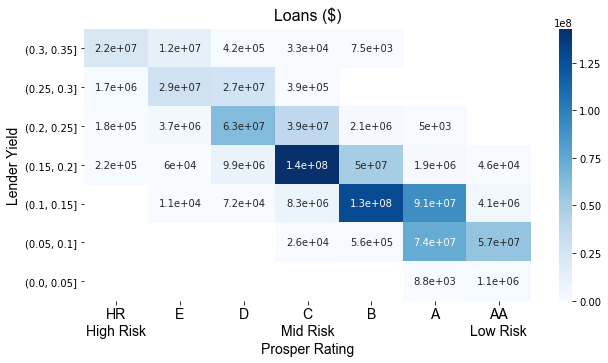

In [70]:
#Aggregate Loans
plt.figure(figsize=(10,5))
ax=sb.heatmap(yield_rating_amount, cmap=base_palette, vmin=1000, annot=True)
ax.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5])
ax.set_xticklabels(PRating_Risk, minor=False, fontdict=axis_font)
plt.title('Loans ($)', fontdict=title_font)
plt.xlabel('Prosper Rating', fontdict=axis_font)
plt.ylabel('Lender Yield',fontdict=axis_font );

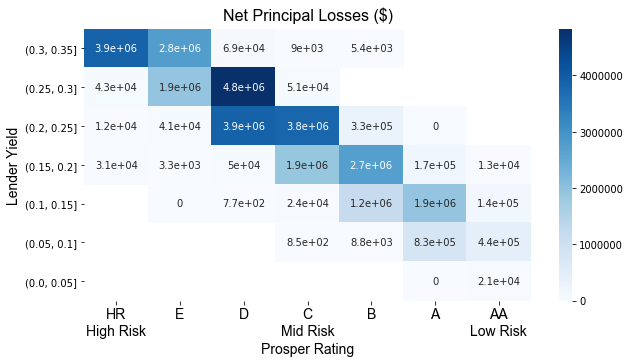

In [71]:
#Aggregate Net Principal Loss
plt.figure(figsize=(10,5))
ax=sb.heatmap(yield_rating, cmap=base_palette, vmin=0, annot=True)
ax.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5])
ax.set_xticklabels(PRating_Risk, minor=False, fontdict=axis_font)
plt.title('Net Principal Losses ($)', fontdict=title_font)
plt.xlabel('Prosper Rating', fontdict=axis_font)
plt.ylabel('Lender Yield',fontdict=axis_font );

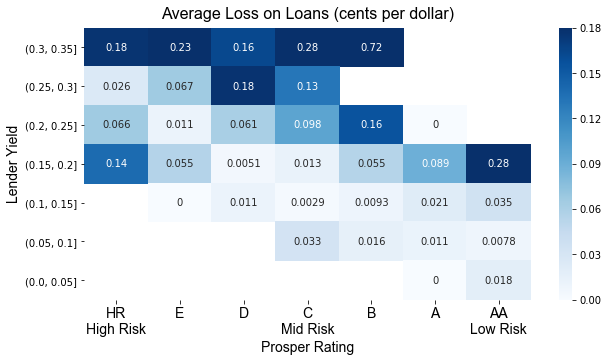

In [72]:
#Average Loss on Loans
plt.figure(figsize=(10,5))
ax=sb.heatmap(yield_rating/yield_rating_amount, cmap=base_palette,annot=True, vmax=0.18)
ax.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5])
ax.set_xticklabels(PRating_Risk, minor=False, fontdict=axis_font)
plt.title('Average Loss on Loans (cents per dollar)', fontdict=title_font)
plt.xlabel('Prosper Rating', fontdict=axis_font)
plt.ylabel('Lender Yield',fontdict=axis_font );

Loan amounts and Net Principal Loss are summed over 5% increments in Lender Yield for each Prosper Rating.  Dividing Aggregate Net Principal Loss by Aggregate Loan amount, we arrive at an Average Loss on Loans.

In terms of dollars, the highest amount of loans are C-rated with yield 15-20%, followed by B-rated at 10-15%.

In contrast, the higher Net Principal Losses in terms of dollars are D rated loans 25-30% yield

By setting the heatmap to flag losses of 18c per dollar or more (which is approximately the average lender yield), it is apparent that the heaviest average losses correspond with the higher yield confirming that high risk equals high reward.

The Average Loss on Loans chart can also be used to help with investment selection.  By determining an investor's risk tolerance, that is how much the investor can stand to lose, the chart can direct the investor to an appropriate risk (Prosper rating) vs return (Lender Yield) level.  



#### Risk (Non Performing Loan) vs Return (Monthly Loan Payment)
Exploring the ability to pay the Monthly Loan Payment given the Stated Monthly Income

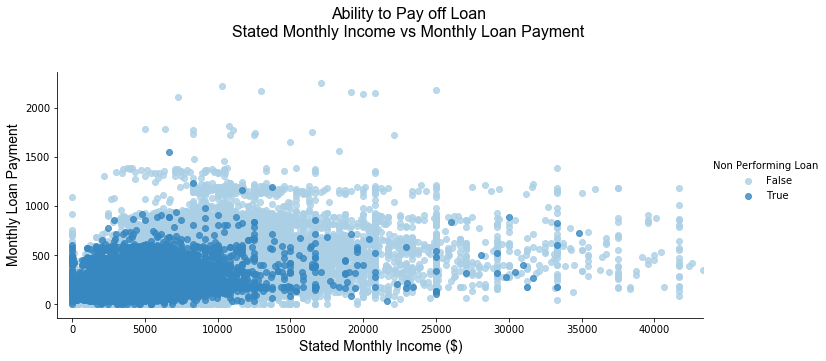

In [73]:
g=sb.lmplot(data= loans_post2009, x='StatedMonthlyIncome',y='MonthlyLoanPayment',hue='NonPerfLoan', 
            fit_reg=False,#scatter_kws={'alpha':1/5},
             palette=base_palette, height=5, aspect=2, legend=False, legend_out=True)
plt.subplots_adjust(top=0.8)
g.set(xlim=(-1000, loans_post2009['StatedMonthlyIncome'].describe([0.999])['99.9%']))

g.set_xlabels('Stated Monthly Income ($)', fontdict=axis_font)
g.set_ylabels('Monthly Loan Payment', fontdict=axis_font)

g.fig.suptitle('Ability to Pay off Loan\nStated Monthly Income vs Monthly Loan Payment', 
               fontdict=title_font, fontsize='16')

g.add_legend(title='Non Performing Loan')
plt.tight_layout;

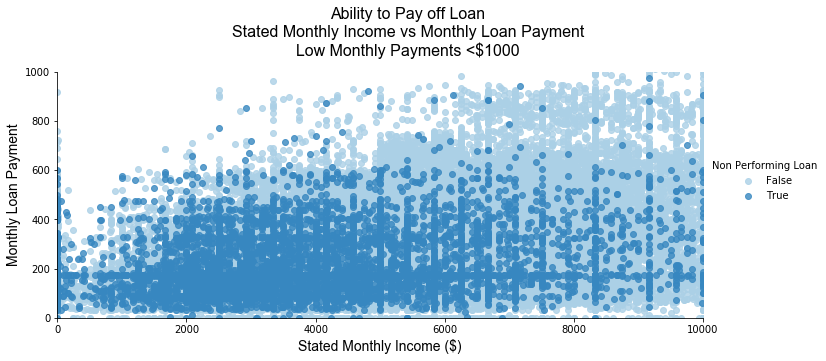

In [74]:
g=sb.lmplot(data= loans_post2009, x='StatedMonthlyIncome',y='MonthlyLoanPayment',hue='NonPerfLoan', 
            fit_reg=False,#scatter_kws={'alpha':1/5},
             palette=base_palette, height=5, aspect=2, legend=False, legend_out=True)
plt.subplots_adjust(top=0.8)
g.set(xlim=(0, 10000), ylim=(0,1000))

g.set_xlabels('Stated Monthly Income ($)', fontdict=axis_font)
g.set_ylabels('Monthly Loan Payment', fontdict=axis_font)

g.fig.suptitle('Ability to Pay off Loan\nStated Monthly Income vs Monthly Loan Payment\nLow Monthly Payments <$1000', 
               fontdict=title_font, fontsize='16')

g.add_legend(title='Non Performing Loan')
plt.tight_layout;

Looking at abilty to pay the loan based on monthly income, the clustering in the bottom shows that a low monthly payment does not guarantee that the borrower will be able to service the loan.  

Similarly of interest is the low incidence of non-performing loans for the high monthly loan payments (greater than `$`1000).  The higher monthly loan payments coincide on average with a higher stated monthly income.

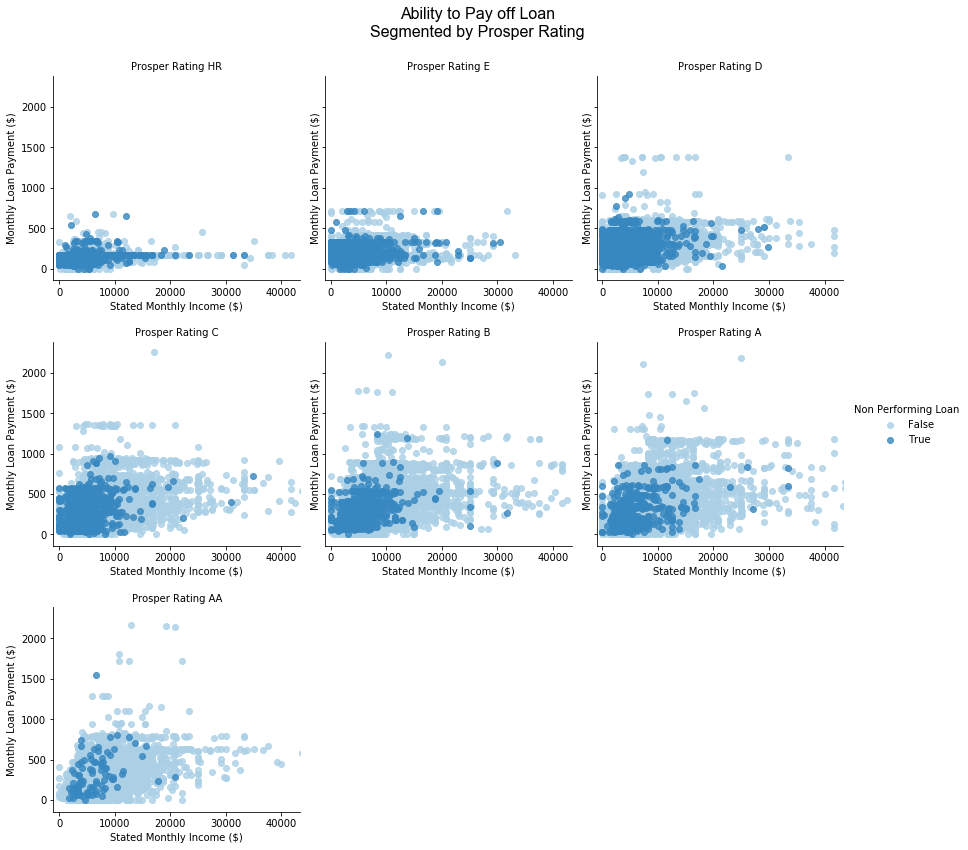

In [75]:
g=sb.FacetGrid(data=loans_post2009, hue='NonPerfLoan', col='ProsperRating (Alpha)', 
               col_wrap=3, height=4, palette=base_palette, legend_out=True)
g.map(sb.regplot, 'StatedMonthlyIncome', 'MonthlyLoanPayment', fit_reg=False)
g.set(xlim=(-1000, loans_post2009['StatedMonthlyIncome'].describe([0.999])['99.9%']))

g.set(xlabel='Stated Monthly Income ($)', ylabel='Monthly Loan Payment ($)')
g.set_titles('Prosper Rating {col_name}')

for ax in g.axes.flat:
    _ = plt.setp(ax.get_xticklabels(), visible=True)
    
plt.subplots_adjust(top=0.9, hspace=0.3)
g.fig.suptitle('Ability to Pay off Loan\nSegmented by Prosper Rating', fontdict=title_font, fontsize=16)
g.add_legend(title='Non Performing Loan');

Extending the analysis of Ability to Pay off the loan by segmenting by Prosper Rating.  The steps in monthly payments can be observed -  high risk HR rating with monthly payments of upper limit generally `$`500, and low risk A rating mostly under `$`1,500. 

Lowest risk AA Rating has monthly loans mostly under `$`1,000 which is a step down from A, but this can be due to the trend seen throughout the entire analysis of lower amounts of AA loans overall.

Comparing the trend of non-performing loans to performing loans, for the higher risk D to HR ratings, non performing and performing loans cover the same range of monthly loans payments.  

For the mid to low risk C to A ratings, the non performing loans interestingly cover around 3/4 of the range of monthly loan payments covered by the performing loans.  Of further interest is that this range of the non-performing loans is unintuitively at the lower 3/4 range, rather than the upper range of monthly loan payment amount

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

**Risk vs Return**
The visualization of Lender Yield vs Non Performing Loans strengthens the concept of Risk being compensated with Returns.  

We see the interaction between how returns (Lender Yield) increases for risk taken, as proxied by the Prosper Rating and determined at the outset of a loan.  

The visualizations also shows that within each Prosper Rating bucket, risk is still being compensated as shown by higher median yield for non-performing loans compared to performing loans, which is a risk that only becomes apparent during the loan term

**Non-performing Loans over Time**
This visualzation confirms the success in Prosper's business model.  It shows that the business model is achieving growth, as shown by increased number of loans over time, and that the model is minimizing and decreasing risks as shown by the low level and decreasing trends in Non-Performing Loans.  This analysis does not however take into account how returns for investors has trended over time.

**Prosper Rating as a valid risk predictor**
The Term visualization and Ability to Pay off Loan visualization confirms Prosper Rating as a valid risk predictor as the frequency of non-performing loans is shown to be heightened for the higher risk D-HR Ratings compared to the mid to-lower risk C to AA Ratings

### Were there any interesting or surprising interactions between features?

The Ability to Pay off Loan visualizations were surprising as they highlighted that non-performing loans more frequently coincided with lower monthly payments.  I would have expected a higher frequency of Non-performing loans at the higher monthly payments.  Across the Ratings, especially the mid-to-low risk C-A ratings where there is a larger set of higher monthly payments, the non-performing loans clustered around monthly payments `$`500 and below.  

Consideration must however be taken that:
- The bulk of data for all loans is in the lower left section, so a high level of non-performing loans should be expected
- Higher monthly loan payments would generally mean higher loan amounts, again generally taken up by less risky borrowers.  
- Stated monthly income is self reported

#### References
- [Prosper website](https://www.prosper.com/)
- [Prosper Wikipedia](https://en.wikipedia.org/wiki/Prosper_Marketplace)
- [Propser Dataset](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv.)
- [Prosper Variable Dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)
